# Extinction coefficients

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib import cm #color map
from matplotlib.ticker import FormatStrFormatter # set decimals in ticks
from matplotlib import rc

font=15
fontfml='Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
#plt.rcParams['text.usetex'] = True

# remove default bold font setting--run only on Linux server
import matplotlib as mpl
#del mpl.font_manager.weight_dict['rome']
#mpl.font_manager._rebuild()

In [2]:
"""
# This function
# The code above
# A description of this code:
"""

import numpy as np
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,LogLocator
import matplotlib.pyplot as plt
import matplotlib
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import os, sys
sys.path.append(os.path.abspath("./test/"))
from DrLi_gorgeous_plotlib import *
from WOPP_Rottgers2010 import *

fig_dir = "./figure/"

dnu=4
nu = np.arange(2500, 33333, dnu)
Tc= 20
S = 35

# scattering coefficient of liquid water
b, lamb = b_scatcoeff(Tc, S)
b = b[::-1]  # reverse order from lamb to nu
lamb = lamb[::-1]  # reverse order from lamb to nu
nu_sca = 1 / lamb * 1e7  # nm to cm-1
index = np.where(nu == 10000)  # No scattering before 10000 cm-1
coeff_scat = np.zeros(nu.shape[0])
index = int(index[0]) - 1
coeff_scat[index:] = np.interp(nu[index:], nu_sca, b)
sca = coeff_scat
path = './data/profiles/'
# absorption coefficient of liquid water
a, wavelength = a_absorcoeff(Tc, S, path)
a = a[::-1]  # reverse order from lamb to nu
wavelength = wavelength[::-1]  # reverse order from lamb to nu
nu_lw = 1 / wavelength * 1e7  # nm to cm-1
coeff_absorp = np.interp(nu, nu_lw, a)
y = coeff_absorp

In [3]:
sca

array([0.        , 0.        , 0.        , ..., 0.00034598, 0.00034617,
       0.00034636])

In [4]:
## the sigmg_a
path = "./data/profiles/"

import pyreadr

df = pyreadr.read_r(path + 'a_water_wopp.rda') # also works for Rds, rda


data =  df['a_water_wopp']
lamb = data['wavelength']  # nm
lamb = lamb[::-1]
nu_lamb = 1 / lamb * 1e7 
a = data['sigma_a']/100
a = a[::-1]
m_sigma_a = np.interp(nu, nu_lamb, a)
sigma_a_ = y - m_sigma_a
sigma_a = y + m_sigma_a 

In [5]:
S = np.linspace(0,350,36)

In [6]:
# sigma_b
S = np.linspace(0,360,36)
Tc = np.linspace(40,0,36)
lamb = np.arange(300, 1000, 1)
nu_lamb = 1 / lamb * 1e7
nu_lamb = nu_lamb[::-1]

n = len(S)
b = np.zeros([n,len(nu)])
for i in range(n):
    temp,lamb = b_scatcoeff(Tc[i], S[i])
    temp = temp[::-1]
    b[i,:]=np.interp(nu, nu_lamb, temp)

df = pd.DataFrame(data=b)
sigma_b = df.max().values
sigma_b_ = df.min().values

In [7]:
# tick of scattering coeff.
yticks2_str = []
a = np.arange(0,6,1)
print(a)
for i in range(len(a)):
    yticks2_str.append(str(a[i]/10))
    yticks2_str.append('')
yticks2_str.pop()

[0 1 2 3 4 5]


''

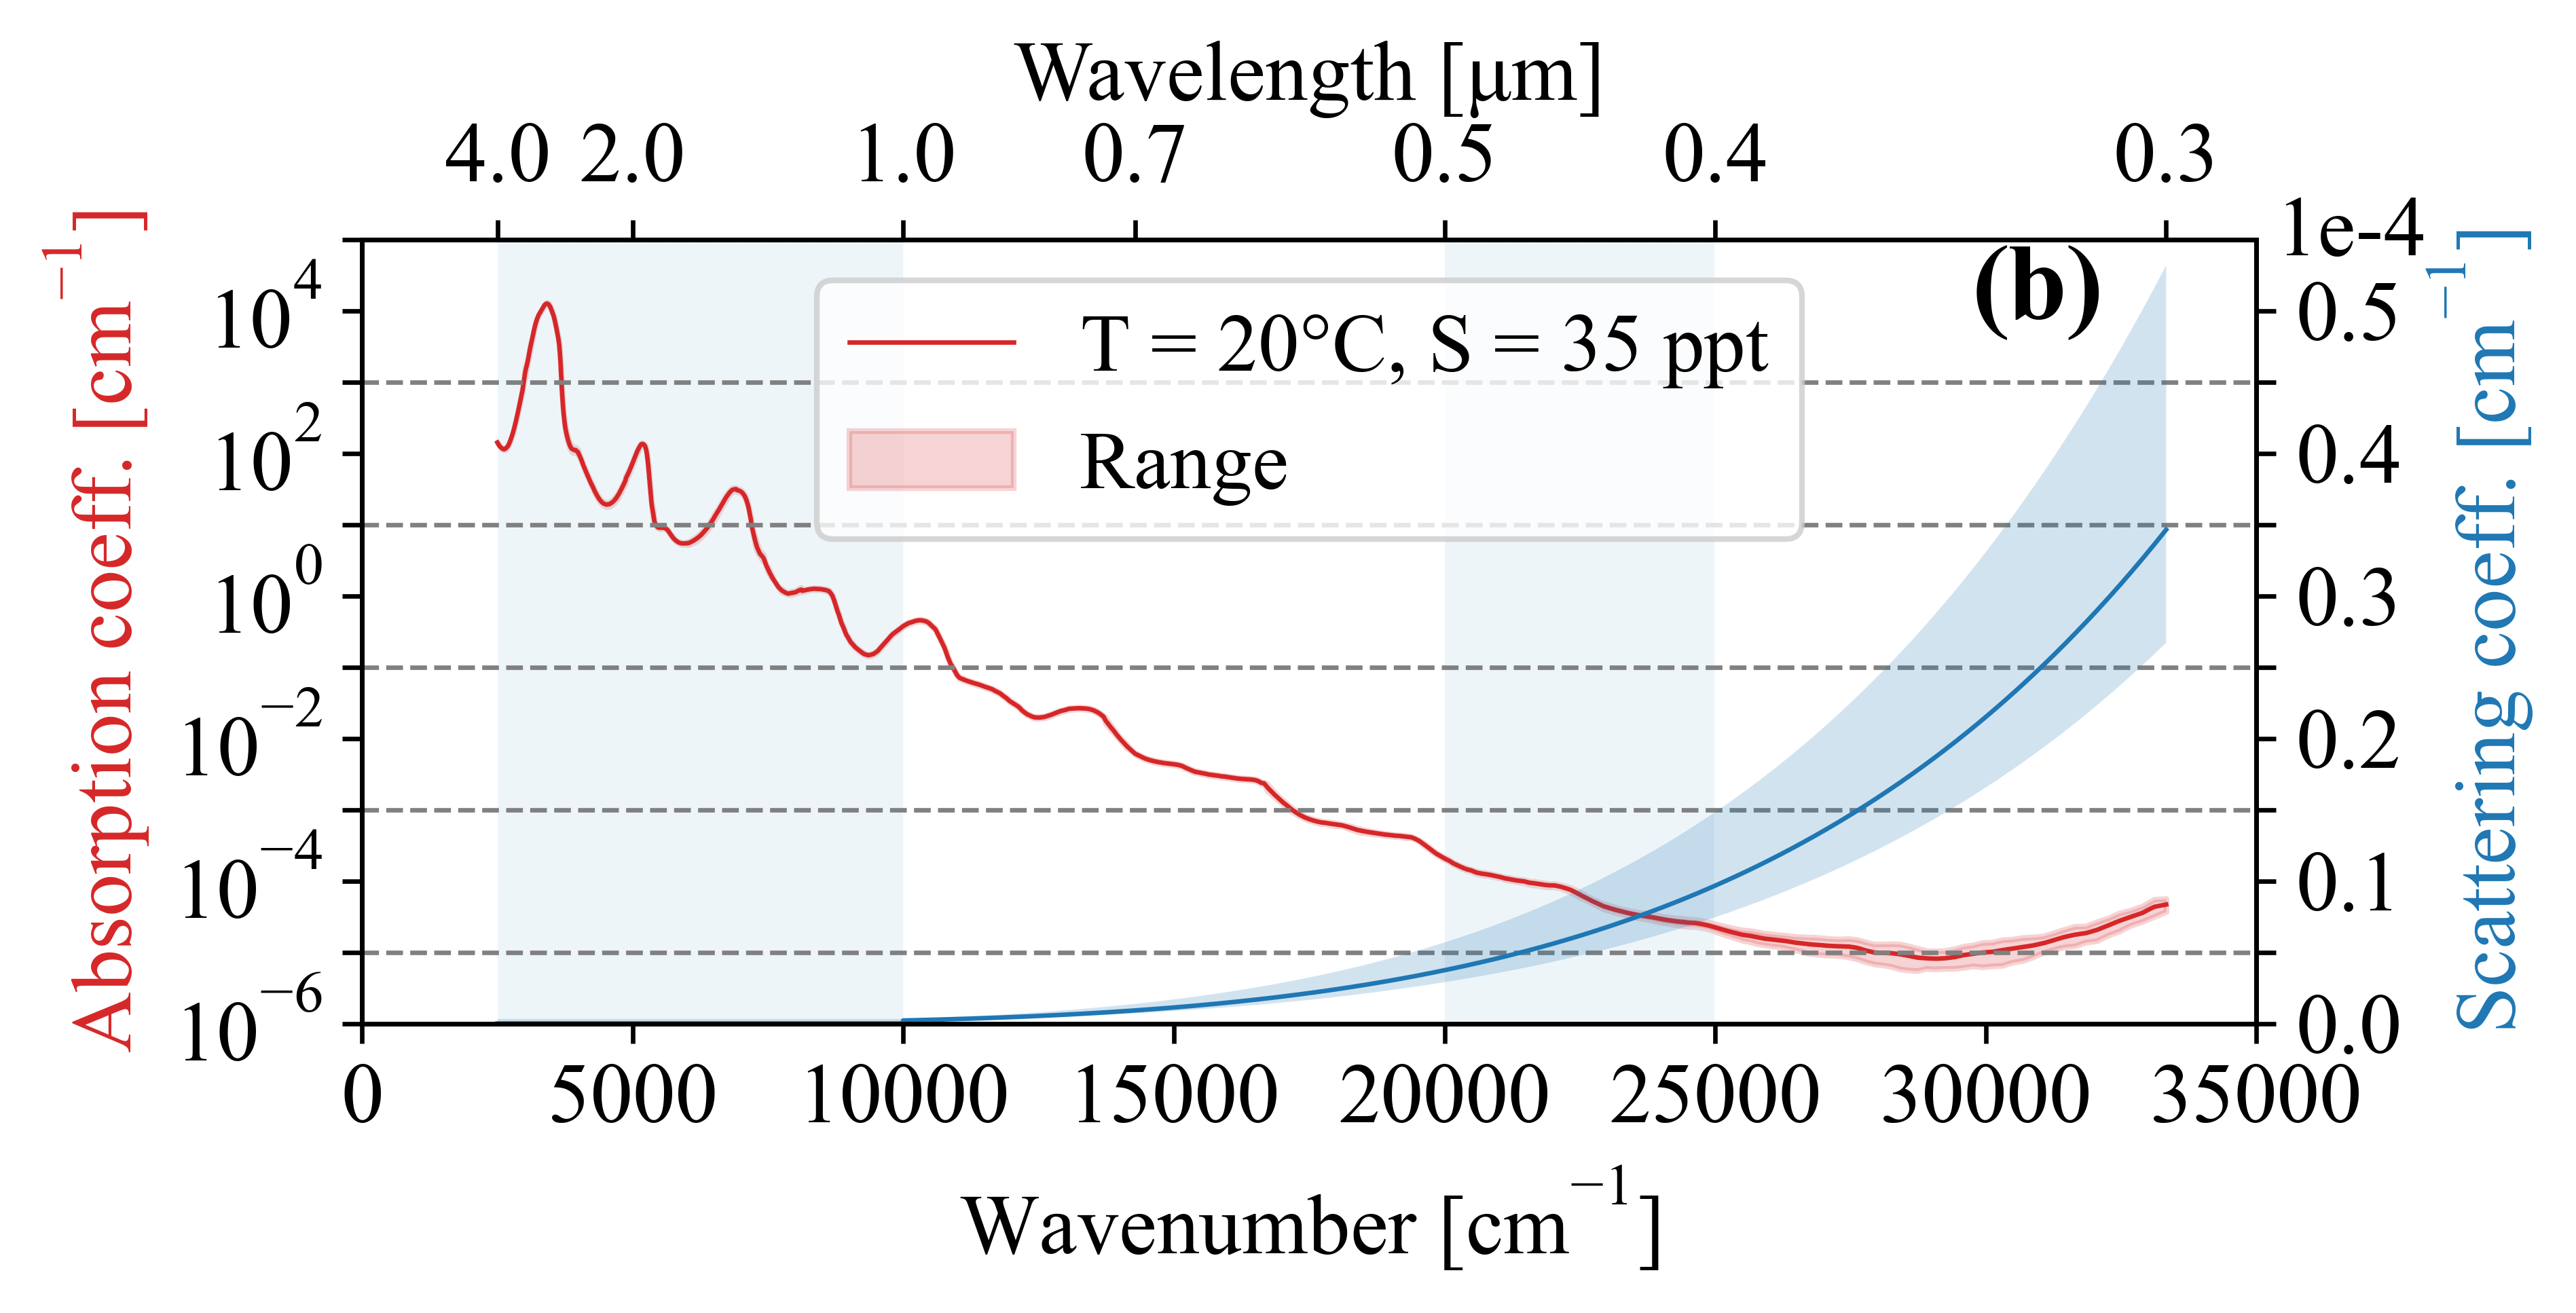

In [8]:
# Create a figure of size y*y inches, 600 dots per inch
fig = plt.figure(figsize=(6, 2.5), dpi=600)
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 
font=15
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.

# Plot absorption coefficient
ax1 = fig.add_subplot(gs1[0])

ax1.plot(nu,y,linewidth=0.8,label="T = 20$\degree$C, S = 35 ppt",color="C3")
ax1.fill_between(nu, sigma_a_, sigma_a, alpha=0.2,color="C3",label="Range")
plt.legend(loc='lower left')
ax1.set_yscale('log')
#ax1.text(-0.05, 0.98, 'log', transform=ax1.transAxes, fontsize=font, family=fontfml)
yticks=[10**c for c in np.arange(-6,6,1, dtype=float)]
ylabel=['$10^{-6}$','','$10^{-4}$','','$10^{-2}$','','$10^{0}$','','$10^{2}$','','$10^{4}$','']
format_axes(ax1,(0,35000),(1e-6,1e5),np.arange(0,35000+5000,5000),yticks,True,False,ylabel)
for label in ax1.get_yticklabels():
    label.set_family(fontfml) 
# Q: only even i in ticks will be axhline
for i in range(len(yticks)):
    if i%2==1:
        plt.axhline(yticks[i], color='gray', linestyle='--',linewidth=0.8)
ax1.set_ylabel('Absorption coeff. [cm$^{-1}$]',fontsize=font,family=fontfml,color='C3')
ax1.set_xlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)

# Plot scattering coefficient
ax2 = ax1.twinx()
ax2.plot(nu,sca,linewidth=0.8,label="T = 20$\degree$C, S = 35 ppt")
ax2.fill_between(nu, sigma_b_, sigma_b, alpha=0.2,label="Range")
ax2.set_ylabel('Scattering coeff. [cm$^{-1}$]',fontsize=font,family=fontfml,color='C0')
ax2.set_yticks(np.arange(0,5.0e-4+0.5e-4,0.5e-4))
ax2.set_ylim(0,5.5e-4)
ax2.text(1.01, 0.98, '1e-4', transform=ax2.transAxes, fontsize=font, family=fontfml)
ax2.set_yticklabels(yticks2_str)

# shading the bands
dnu=0.1
b_lims=np.array([2500,5000,10000, 14285, 20000, 25000, 33333])
bands=[[b_lims[0],b_lims[2]],[b_lims[2],b_lims[4]], [b_lims[4],b_lims[5]]]
band_labels = ['(infrared band)', '','(visible)','(UV band)']
for j in range(0,len(bands)):
    nu_band=np.arange(bands[j][0],bands[j][1],10)
    if (j == 0 or j == 2):
        ax1.fill_between(nu_band,nu_band*0+1e-6,nu_band*0+10**7,color='#a6cee3',linewidth=0,alpha=0.2)

# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)

# combine the two legends
handles, labels_2 = ax1.get_legend_handles_labels()
handles2, labels_3 = ax2.get_legend_handles_labels()
#handles = handles + handles2
#labels_2 = labels_2 + labels_3
ax1.legend(handles, labels_2, loc='upper center',prop={'size':font-0.5,'family':fontfml},ncol=1)

ax2.text(0.85, 0.9, '(b)', transform=ax2.transAxes, fontsize=font+4, family=fontfml,weight='bold')

fig.savefig(fig_dir+'extincoeff.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [9]:
dnu = 5
lamb = 1/nu*10000  # cm-1 to um
lam = lamb[::-1]

#import the Segelstein data
h2o = np.genfromtxt('https://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

h2o_re = np.interp(lam, h2o_lam, h2o_mre)
h2o_im = np.interp(lam, h2o_lam, h2o_mim)
h2o_complex = np.vectorize(complex)(h2o_re, -h2o_im)

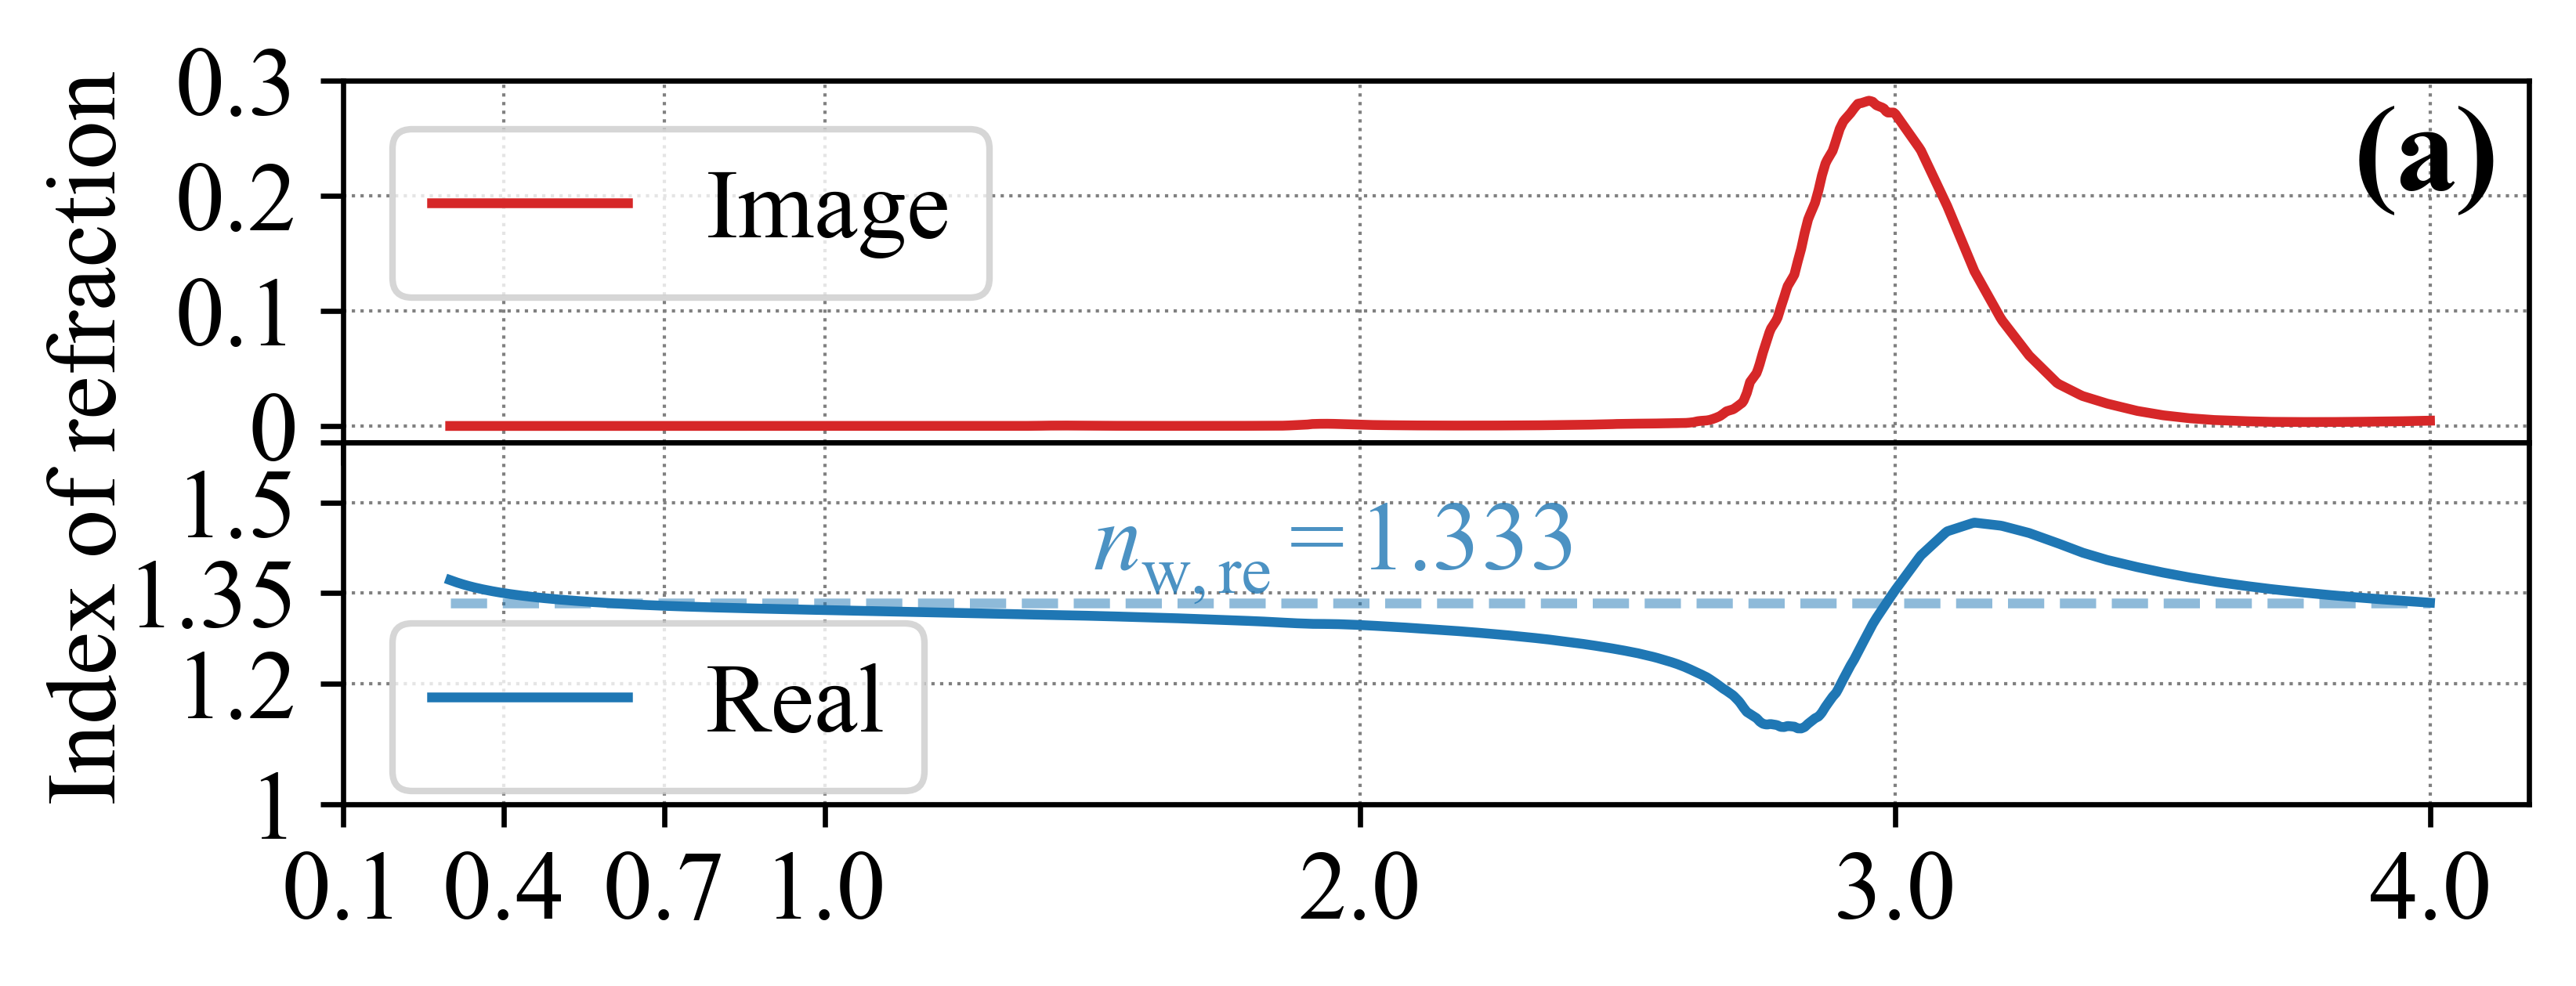

In [12]:
# Create a figure of size y*y inches, 600 dots per inch
fig = plt.figure(figsize=(6, 2),dpi=600)
font=15
fontfml='Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
ax2 = axs[0]
ax1 = axs[1]

ax2.plot(lam,h2o_im,color="C3",label="Image")
ax2.set_xticks([0.1,0.4,0.7,1,2,3,4])
ax2.set_yticks([0,0.1,0.2,0.3])
ax2.set_yticklabels([0, 0.1,0.2, 0.3])
#ax1.set_xlabel('Wavelength [μm]',fontsize=font+2,family=fontfml)
ax2.grid(True)
ax2.grid(color='grey', linestyle=':', linewidth=0.5)
ax2.legend(loc='upper left')
ax2.text(0.92, 0.7, '(a)', transform=ax2.transAxes, fontsize=font+4, family=fontfml,weight='bold')

ax1.plot(lam,h2o_re,color="C0",label="Real")
ax1.plot((0.3,4),(1.333,1.333),"--",alpha=0.5,color="C0")
ax1.annotate(r'$n_{\mathrm{w},\mathrm{re}}=1.333$', xy=(1.5,1.39),color="C0",alpha=0.8)
#ax1.set_ylabel('$n_{\mathrm{w},\mathrm{real}}$',fontsize=font+2,family=fontfml,color='C0')
ax1.set_xticks([0.1,0.4,0.7,1,2,3,4])
ax1.set_yticks([1.,1.2,1.35,1.5,1.6])
ax1.set_yticklabels([1,1.2,1.35,1.5,''])
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)
ax1.legend(loc='lower left',bbox_to_anchor=(0., -0.1))
fig.supylabel(r'Index of refraction',color='k',fontsize=font,family=fontfml)

fig.savefig(fig_dir+'n_water.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

/var/folders/m0/td6gfbvj1h98fyhzk7kyxg900000gn/T/ipykernel_11170/69006098.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['','10 km','100 m','1 m','1 cm', '100 μm', '1 μm', '10 nm'])


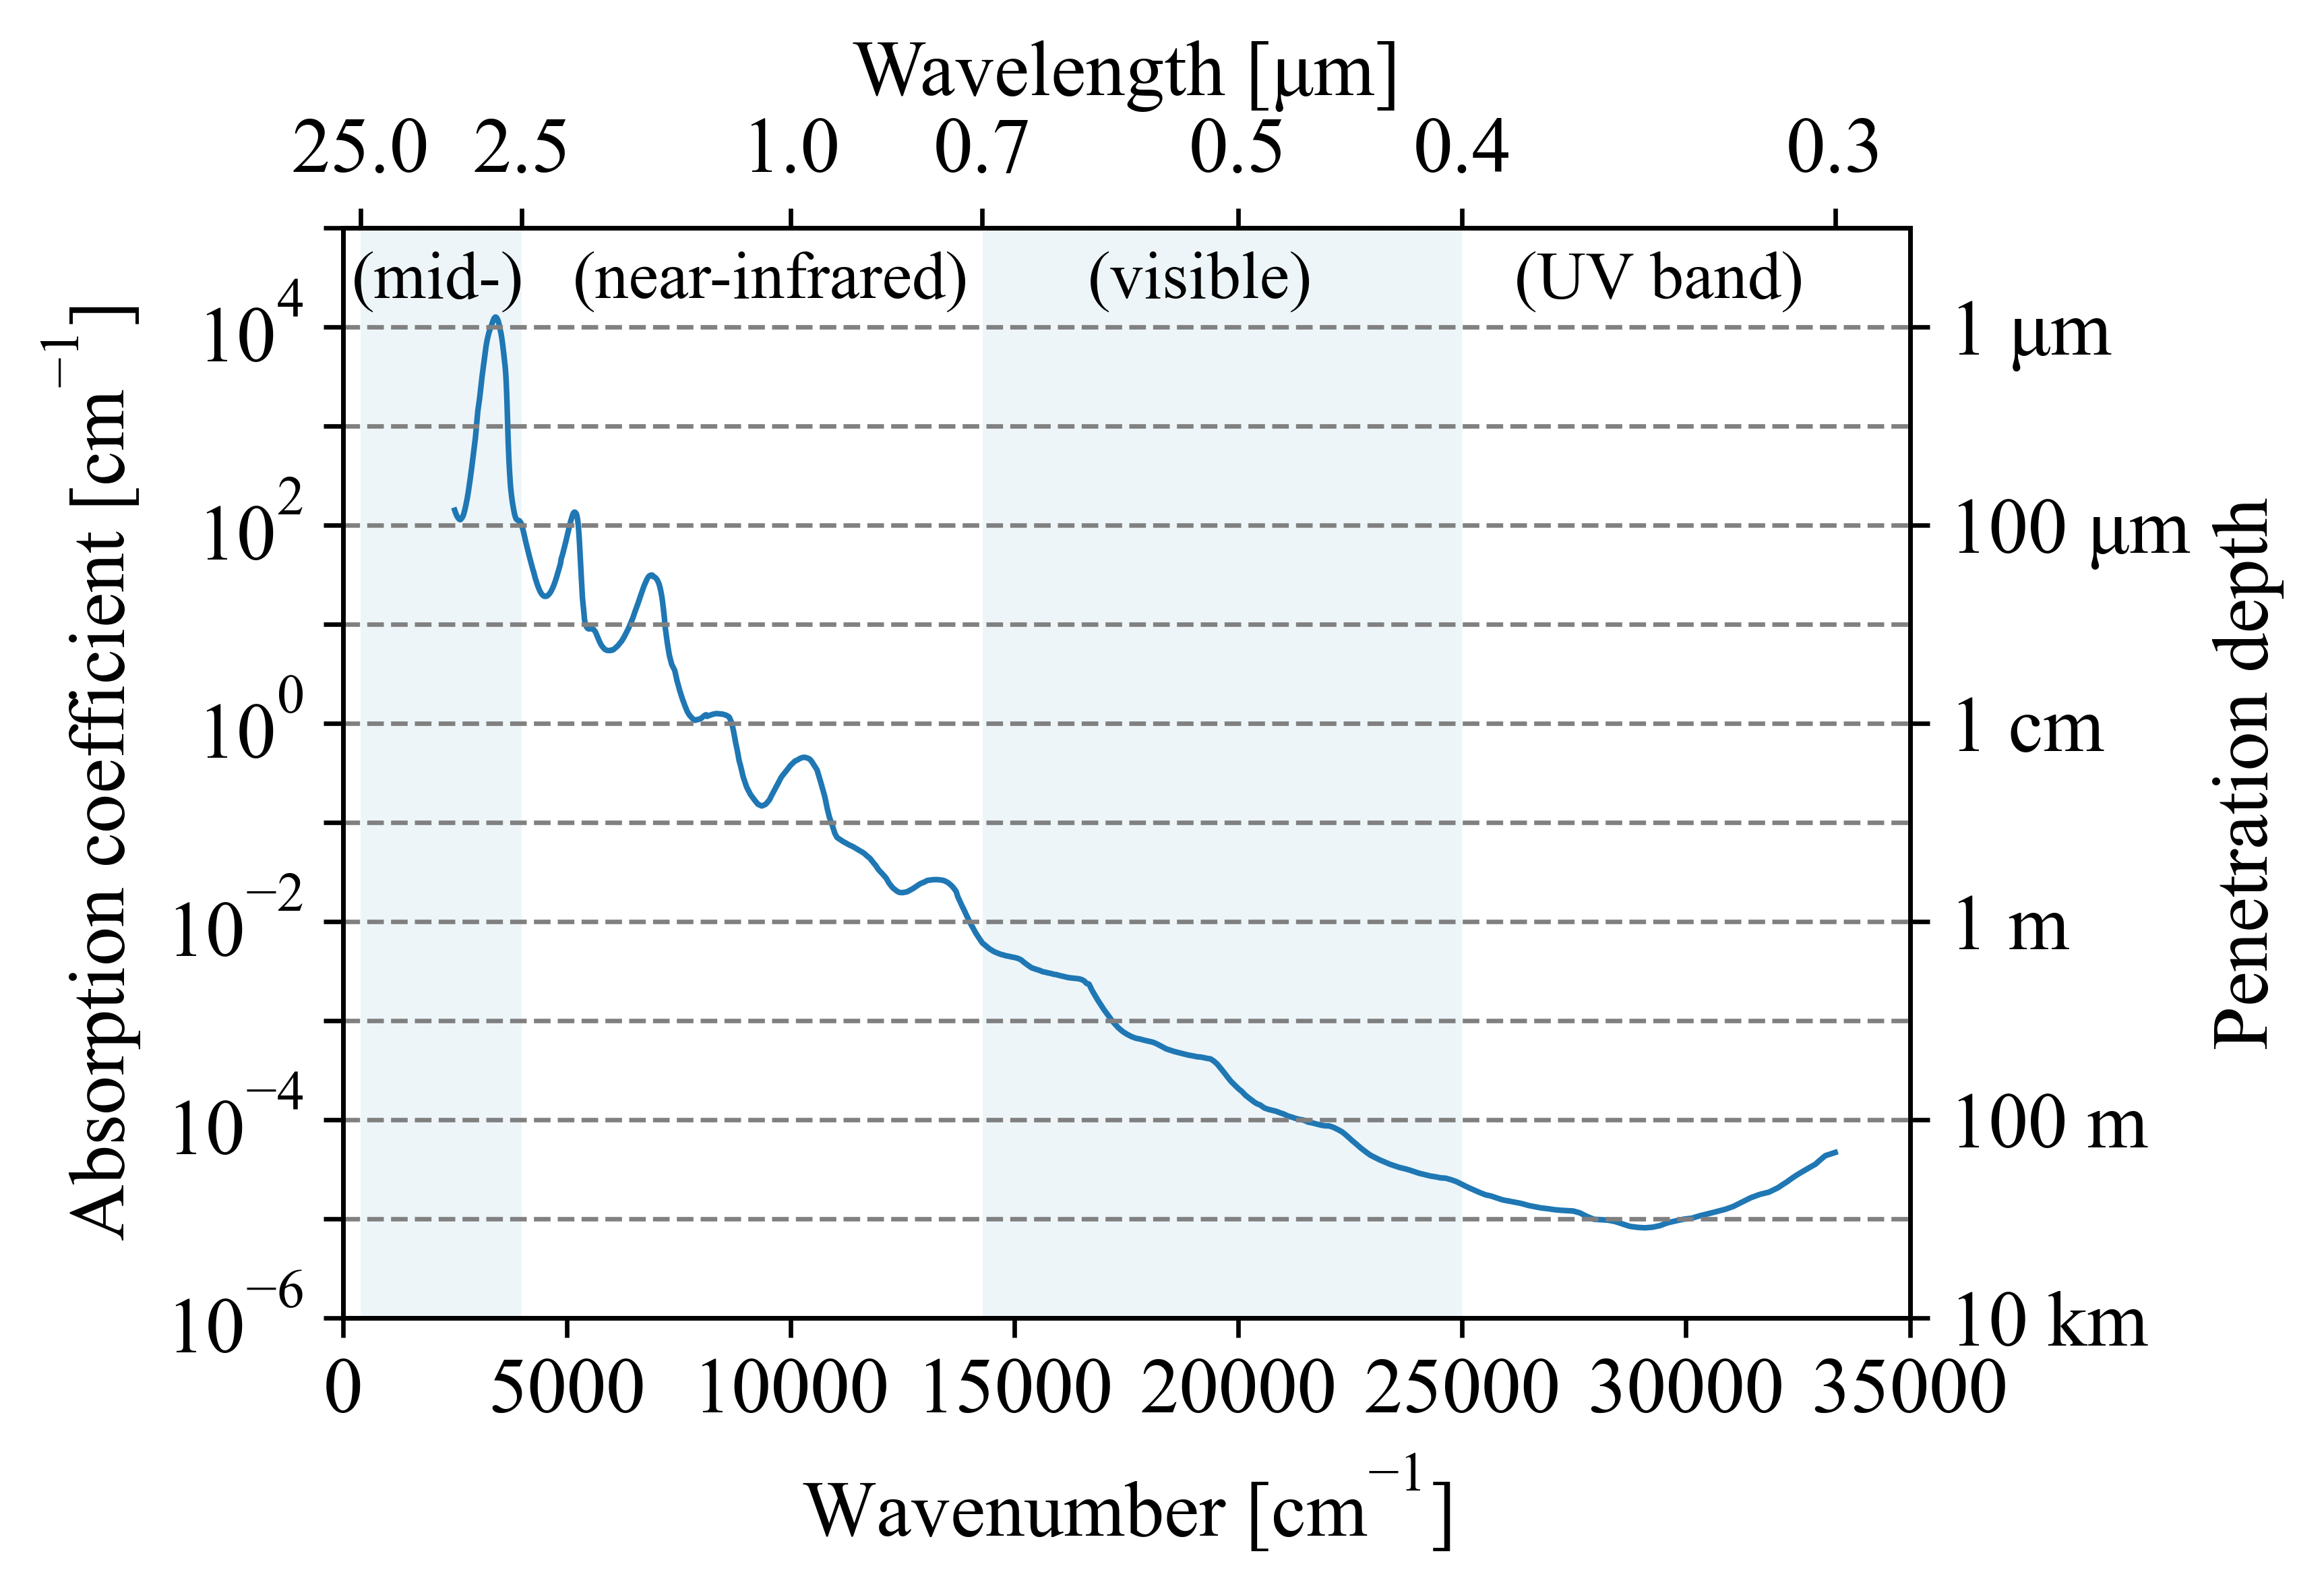

In [103]:
# Create a figure of size y*y inches, 600 dots per inch
fig = plt.figure(figsize=(5, 3.5), dpi=600)
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 14  # 
font=14
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.

# Plot absorption coefficient
ax1 = fig.add_subplot(gs1[0])

ax1.plot(nu,y,linewidth=1,color="C0")
#ax1.fill_between(nu, sigma_a_, sigma_a, alpha=0.2,color="C3")
#plt.legend(loc='lower left')
ax1.set_yscale('log')
#ax1.text(-0.05, 0.98, 'log', transform=ax1.transAxes, fontsize=font, family=fontfml)
yticks=[10**c for c in np.arange(-6,6,1, dtype=float)]
ylabel=['$10^{-6}$','','$10^{-4}$','','$10^{-2}$','','$10^{0}$','','$10^{2}$','','$10^{4}$','']
format_axes(ax1,(0,35000),(1e-6,1e5),np.arange(0,35000+5000,5000),yticks,True,False,ylabel)
for label in ax1.get_yticklabels():
    label.set_family(fontfml) 
# Q: only even i in ticks will be axhline
for i in range(len(yticks)):
    #if i%2==1:
    plt.axhline(yticks[i], color='gray', linestyle='--',linewidth=0.8)
ax1.set_ylabel('Absorption coefficient [cm$^{-1}$]',fontsize=font,family=fontfml)
ax1.set_xlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)

# shading the bands
dnu=0.1
b_lims=np.array([400, 4000, 10000, 14285, 20000, 25000, 33333])
# mid-infrared 400-4000(2.5-25), near-infrared 4000-14000(0.7-2.5), visible 14285-25000 (0.4-0.7)
bands=[[b_lims[0],b_lims[1]],[b_lims[1],b_lims[3]], [b_lims[3],b_lims[5]], [b_lims[5],b_lims[6]]]
band_labels = ['(mid-)','(near-infrared)', '','(visible)','(UV band)']
for j in range(0,len(bands)):
    nu_band=np.arange(bands[j][0],bands[j][1],10)
    if (j == 0 or j == 2):
        ax1.fill_between(nu_band,nu_band*0+1e-6,nu_band*0+10**7,color='#a6cee3',linewidth=0,alpha=0.2)
    if j == 3:
        ax1.text((bands[j][0]+bands[j][1])/2-3000,2e4,band_labels[j+1],fontsize=font-2,family=fontfml)
    if j == 2:
        ax1.text((bands[j][0]+bands[j][1])/2-3000,2e4,band_labels[j+1],fontsize=font-2,family=fontfml)
    if j == 1:
        ax1.text((bands[j][0]+bands[j][1])/2-4000,2e4,band_labels[j],fontsize=font-2,family=fontfml)
    if j == 0:
        ax1.text((bands[j][0]+bands[j][1])/2-2000,2e4,band_labels[j],fontsize=font-2,family=fontfml)

# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)

# Plot scattering coefficient
ax2 = ax1.twinx()
ax2.set_ylabel('Penetration depth',fontsize=font,family=fontfml)
#ax2.set_yticks(np.arange(1e-6,1e5,1e1))
ax2.set_ylim(1e-8,1e3)
ax2.set_yscale('log')
ax2.set_yticklabels(['','10 km','100 m','1 m','1 cm', '100 μm', '1 μm', '10 nm'])
fig.savefig(fig_dir+'pene_depth.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [50]:
len(bands)

3

## the relative difference of k-coeff on various T and S

In [9]:
# sigma_b
S = np.linspace(0,360,36)
Tc = np.linspace(40,0,36)
lamb = np.arange(300, 1000, 1)
nu_lamb = 1 / lamb * 1e7
nu_lamb = nu_lamb[::-1]

n = len(S)
b = np.zeros([n,len(nu)])
for i in range(n):
    temp,lamb = b_scatcoeff(Tc[i], S[i])
    temp = temp[::-1]
    b[i,:]=np.interp(nu, nu_lamb, temp)

dfb = pd.DataFrame(data=b)
rela_diff_b = (dfb-sca)/sca*100  # to T=20, S=36

sigma_b_ = dfb.iloc[0]
sigma_b = dfb.iloc[-1]

# absorption coefficient of liquid water
path = "./data/profiles/"
df = pyreadr.read_r(path + 'a_water_wopp.rda') # also works for Rds, rda
lamb = data['wavelength']  # nm
nu_lamb = 1 / lamb * 1e7
nu_lamb = nu_lamb[::-1]

n = len(S)
a = np.zeros([n,len(nu)])
for i in range(n):
    temp,lamb = a_absorcoeff(Tc[i], S[i], path)
    temp = temp[::-1]
    a[i,:]=np.interp(nu, nu_lamb, temp)

dfa = pd.DataFrame(data=a)

rela_diff_a = (dfa-y)/y*100

sigma_a_ = dfa.iloc[0]
sigma_a = dfa.iloc[-1]

#### Relative difference to 
Tc= 20
S = 35

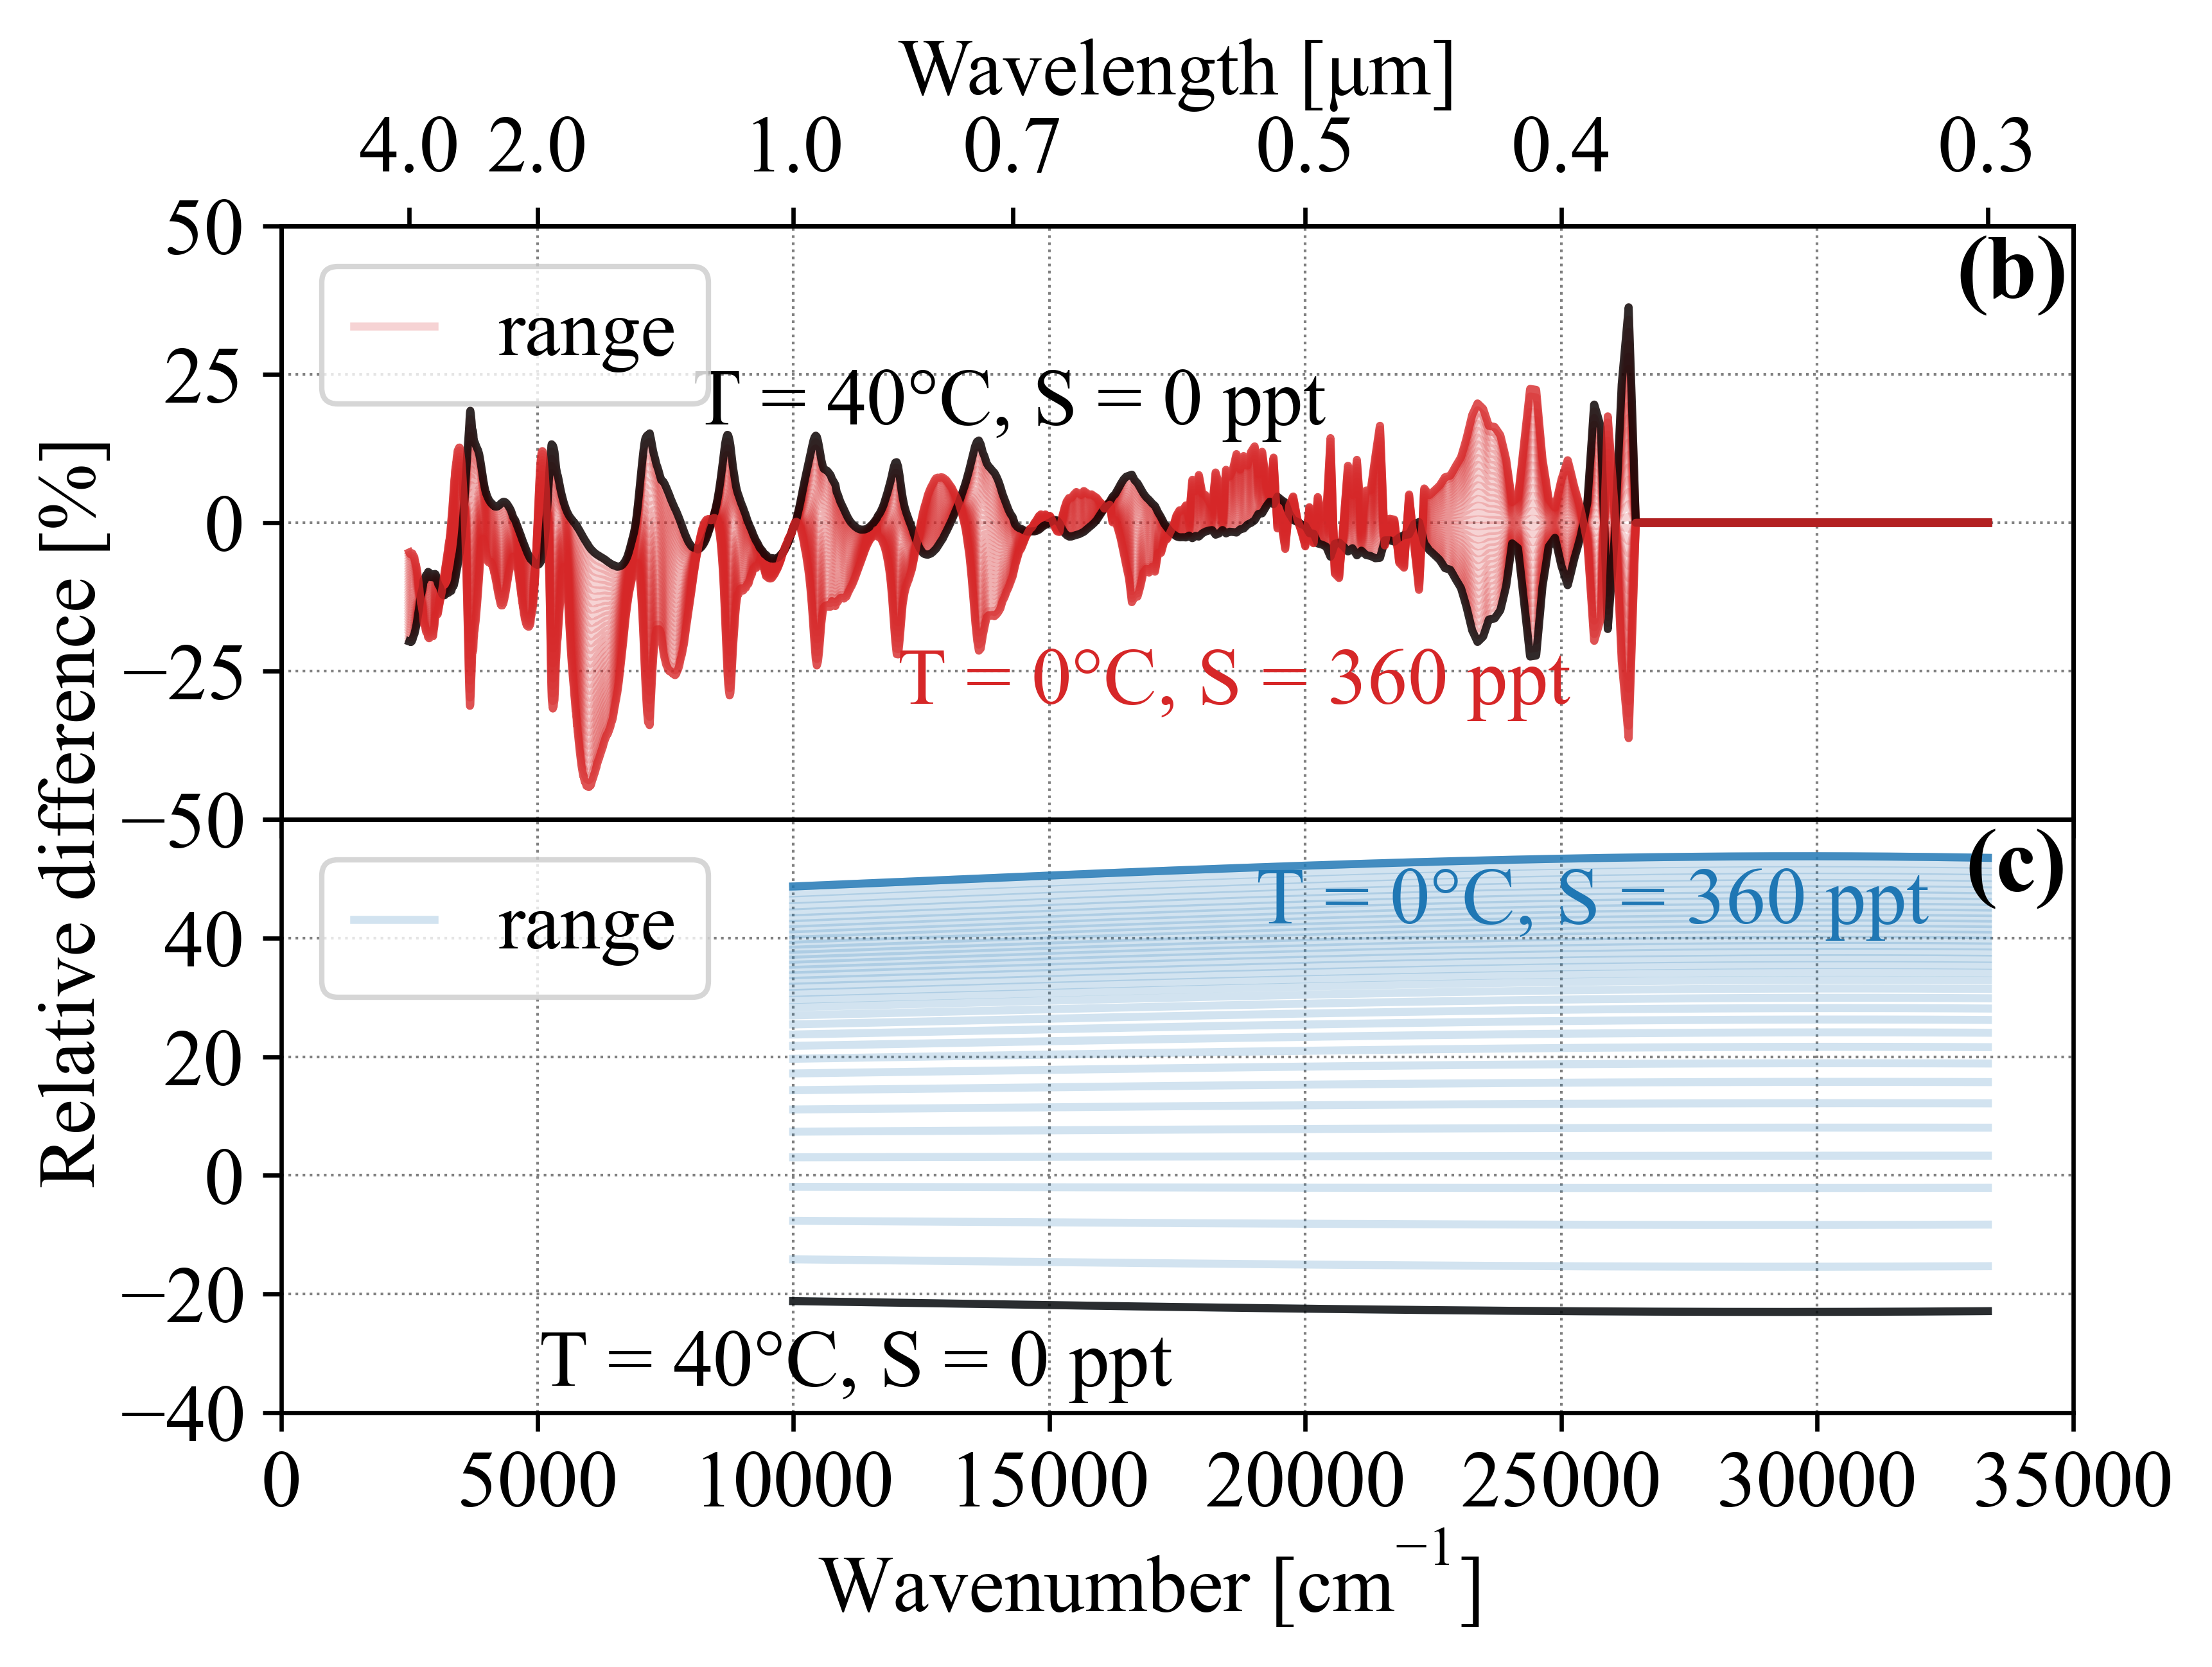

In [64]:
fig = plt.figure(figsize=(6, 4),dpi=600)
font=15
fontfml='Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
ax1 = axs[0]
ax2 = axs[1]

for i in range(35):
    ax1.plot(nu,rela_diff_a.T[i], alpha=0.2,color="C3")
ax1.plot(nu,rela_diff_a.T[i], alpha=0.2,color="C3",label="range")
ax1.plot(nu,rela_diff_a.T[0], alpha=0.8,color="k")#,label="T = 40$\degree$C, S = 0 ppt")
ax1.plot(nu,rela_diff_a.T[35], alpha=0.8,color="C3")#,label="T = 0$\degree$C, S = 360 ppt")
ax1.annotate(f"T = 40$\degree$C, S = 0 ppt", (8000, 22),color="k",
             textcoords="offset points", xytext=(1 * 0.15, -6))
ax1.annotate(f"T = 0$\degree$C, S = 360 ppt", (12000, -25),color="C3",
             textcoords="offset points", xytext=(1 * 0.15, -6))
ax1.legend(loc="upper left",handlelength=1)#,ncol=3)
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)
yticks = np.arange(-50,50+25,25)
ylabel = ['$-$50','$-$25','0','25','50']
format_axes(ax1,(0,35000),(-40,25),np.arange(0,35000+5000,5000),yticks,True,False,ylabel)

for i in range(35):
    ax2.plot(nu,rela_diff_b.T[i], alpha=0.2,color="C0")
ax2.plot(nu,rela_diff_b.T[i+1], alpha=0.2,color="C0",label="range")
ax2.plot(nu,rela_diff_b.T[0], alpha=0.8,color="k")#,label="T = 35$\degree$C, S = 0 ppt")
ax2.plot(nu,rela_diff_b.T[35], alpha=0.8,color="C0")#,label="T = 0$\degree$C, S = 35 ppt")
ax2.annotate(f"T = 40$\degree$C, S = 0 ppt", (5000, -30),color="k",
             textcoords="offset points", xytext=(1 * 0.15, -6))
ax2.annotate(f"T = 0$\degree$C, S = 360 ppt", (19000, 48),color="C0",
             textcoords="offset points", xytext=(1 * 0.15, -6))
ax2.grid(True)
ax2.grid(color='grey', linestyle=':', linewidth=0.5)

yticks = np.array([-40,-20,0,20,40,60])
ylabel = ['$-$40','$-$20','0','20','40','']
format_axes(ax2,(0,35000),(-5,40),np.arange(0,35000+5000,5000),yticks,True,False,ylabel)
plt.legend(loc="upper left",handlelength=1)

# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)

label = fig.supxlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)
label.set_position((0.5, -0.03)) 
fig.supylabel('Relative difference [%]',fontsize=font,family=fontfml)
ax1.text(0.935, 0.88, '(b)', transform=ax1.transAxes, fontsize=font+2, family=fontfml,weight='bold')
ax2.text(0.94, 0.88, '(c)', transform=ax2.transAxes, fontsize=font+2, family=fontfml,weight='bold')

fig.savefig(fig_dir+'extincoeffb.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

## Extinction rate

In [10]:
ra = dfa/(dfa+dfb)
rb = dfb/(dfa+dfb)

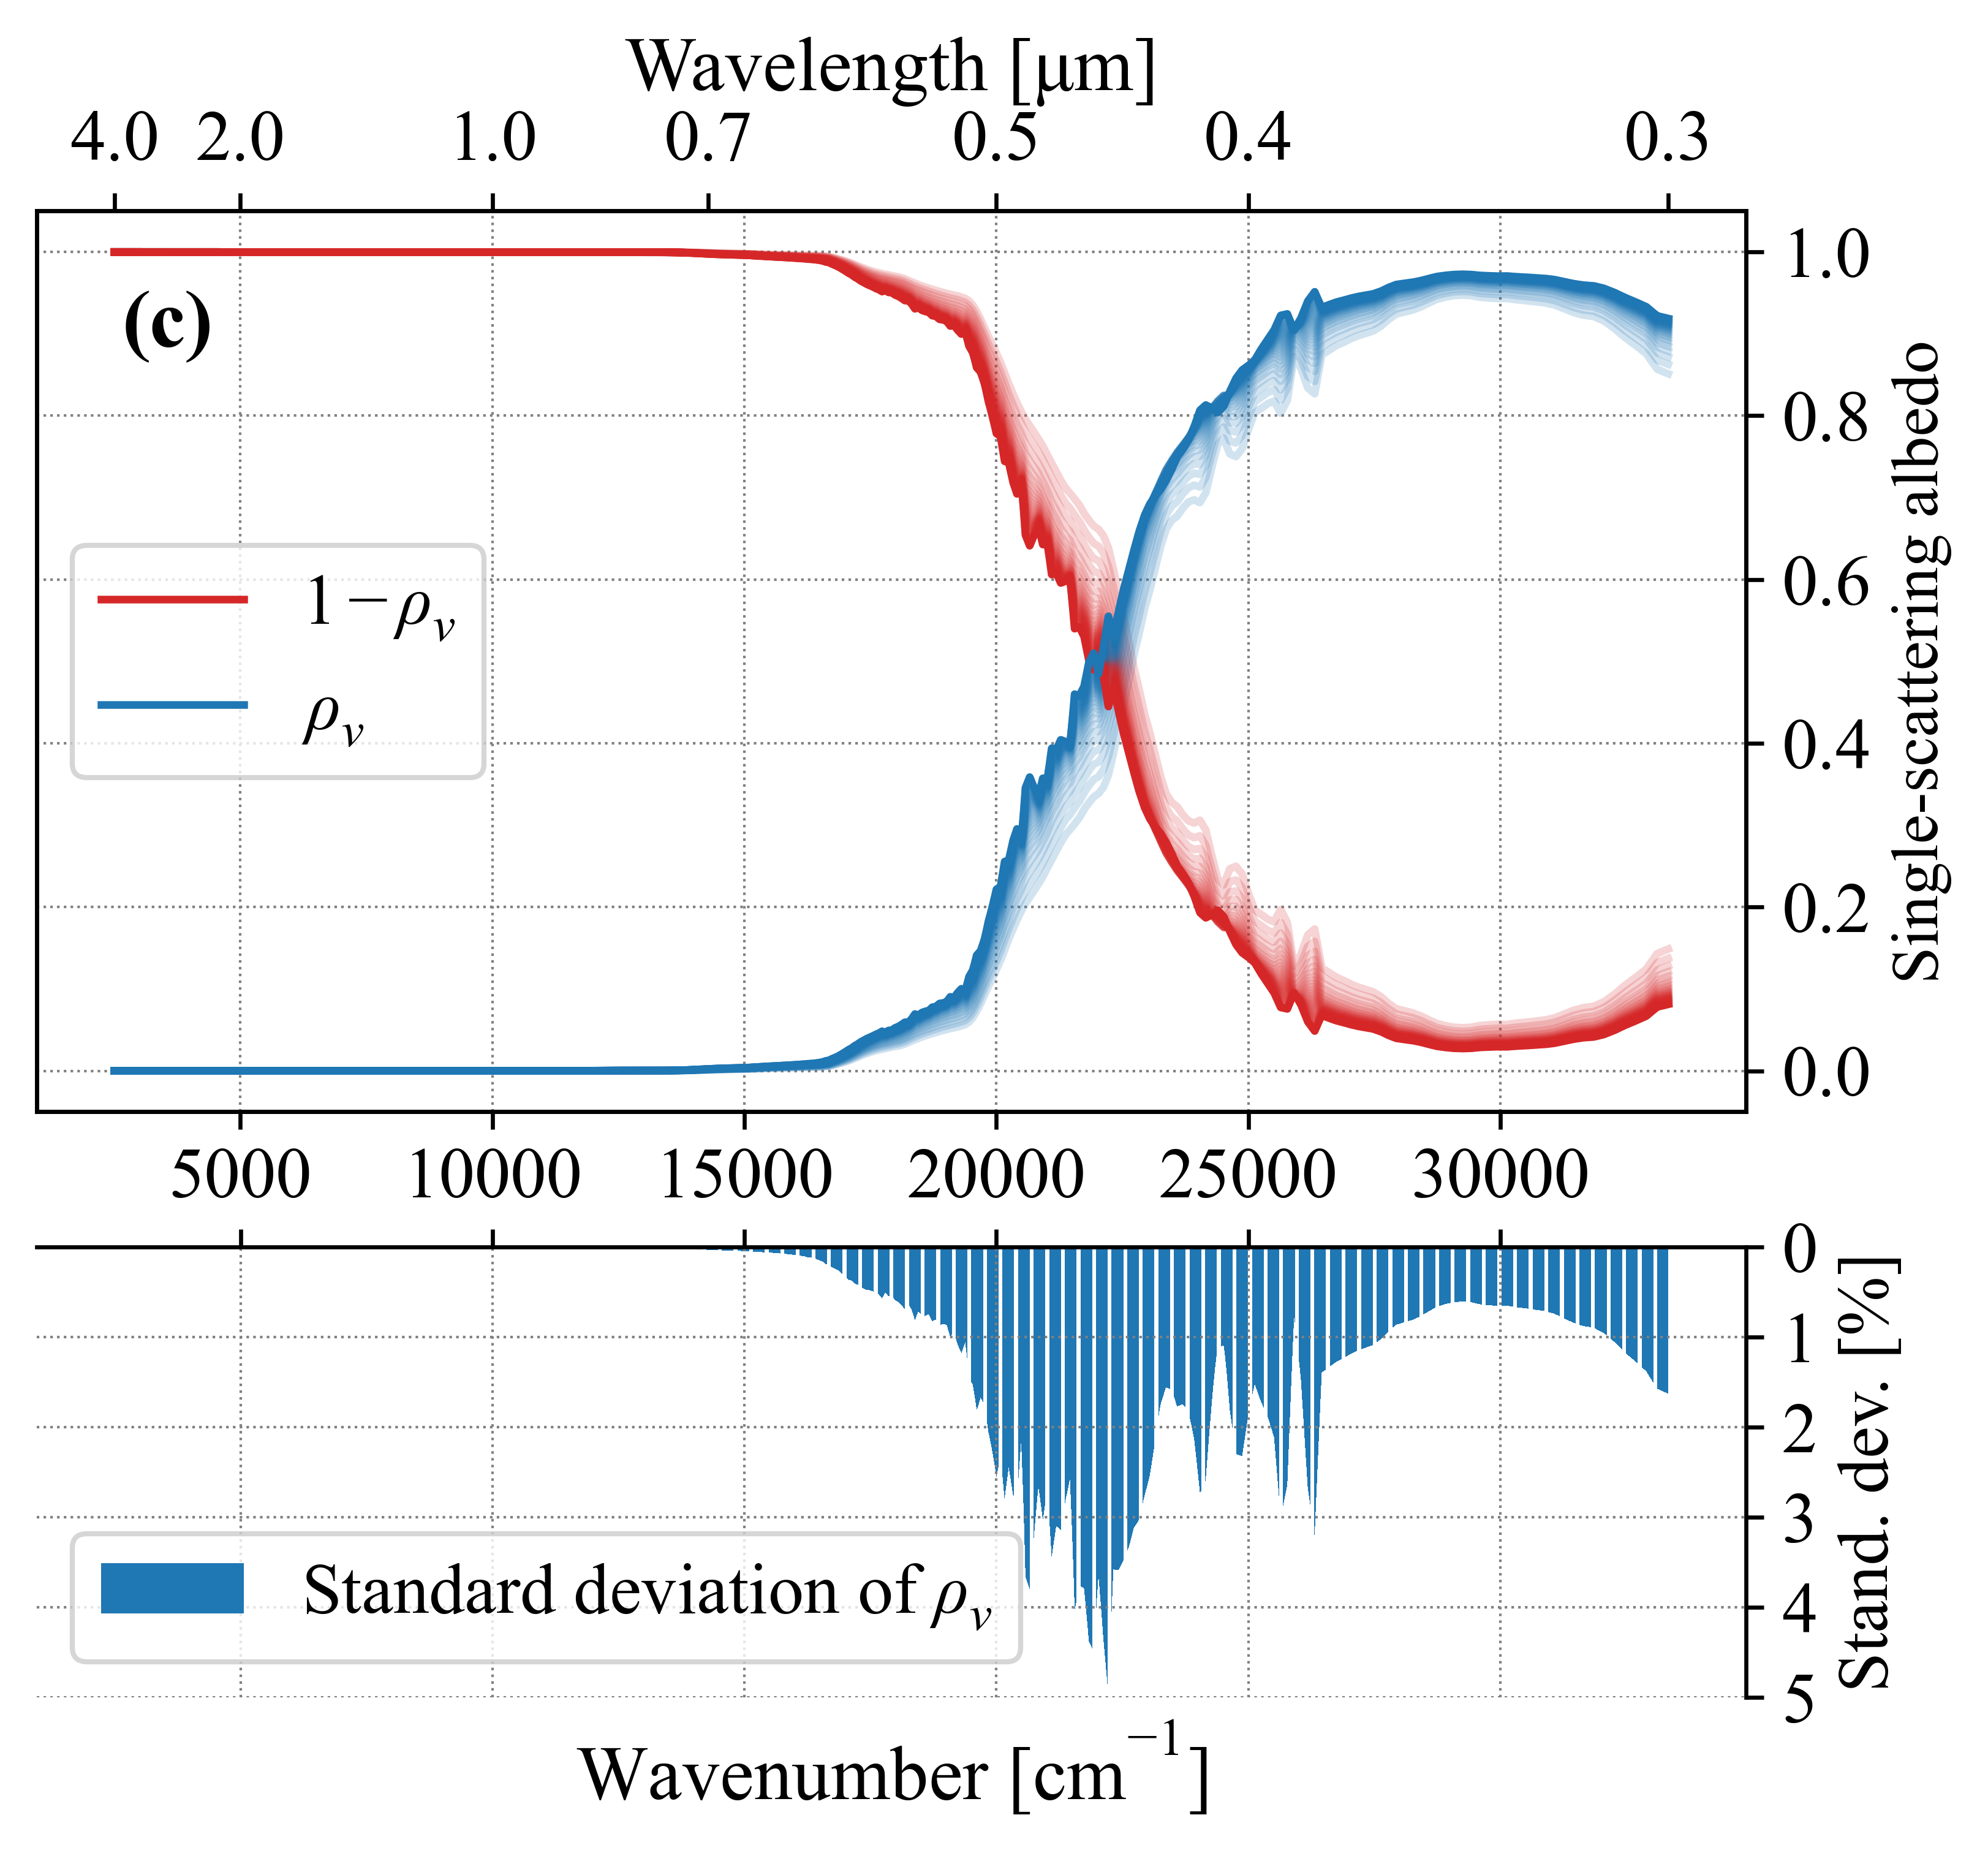

In [26]:
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 14  # 
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

fig, axs = plt.subplots(2,1,figsize=(6,5.25), gridspec_kw={'height_ratios': [2, 1]},dpi=600)
font=14
fontfml='Times New Roman'

ax1 = axs[0]
ax2 = axs[1]

for i in range(35):
    ax1.plot(nu,ra.T[i], alpha=0.2,color="C3")
    ax1.plot(nu,rb.T[i], alpha=0.2,color="C0")
ax1.plot(nu,ra.T[i], color="C3",label=r'$1-\rho_\nu$')
ax1.plot(nu,rb.T[i], color="C0",label=r'$\rho_\nu$')
ax1.legend(loc="center left")
ax1.set_ylabel(r'Single-scattering albedo',fontsize=font-1,family=fontfml)
ax1.yaxis.set_label_position("right")
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)

fluate = ra.std(axis=0)

ax2.bar(nu,-fluate*100,width=3,label=r"Standard deviation of $\rho_\nu$")
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)
ax2.set_ylabel('Stand. dev. [%]',fontsize=font,family=fontfml)
ax2.yaxis.set_label_position("right")
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.grid(True)
ax2.grid(color='grey', linestyle=':', linewidth=0.5)
ax2.set_yticks([-5,-4,-3,-2,-1,0])
ax2.legend(loc="lower left")
ax2.set_ylim(-5,0)
ax2.set_yticklabels(['5','4','3', '2', '1', '0'])
ax2.set_xlabel('Wavenumber [cm$^{-1}$]',fontsize=font+1,family=fontfml)


# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel(r'Wavelength [μm]',fontsize=font+1,family=fontfml)

ax1.text(0.05, 0.85, '(c)', transform=ax1.transAxes, fontsize=font+2, family=fontfml,weight='bold')
#ax2.text(0.05, 0.80, '(d)', transform=ax2.transAxes, fontsize=font+2, family=fontfml,weight='bold')

fig.savefig(fig_dir+'extincRate.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

# blackbody emission

https://www.spectralcalc.com/blackbody_calculator/blackbody.php

In [3]:
from LBL_funcs_fullSpectrum import *
from LBL_funcs_waterRTM import *
import scipy.integrate as integrate
import math
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
sys.path.append(os.path.abspath("./test/"))
from DrLi_gorgeous_plotlib import *
fig_dir = "./figure/"

In [4]:
dnu = 5 # spectral resolutio
nu = np.arange(1, 33333+dnu,dnu)  # cm-1
# wavelength [um]
# a = 1/nu*1e4  # cm-1 -> um
# lam = a[::-1]  # um
# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 10e-6, 1e-9) * 1e6

T = np.arange(800,5800+1000,1000)  # K
T = np.append(330,T)
print(T)
F_dw_os = np.zeros([T.shape[0], nu.shape[0]])
Intens = np.zeros(T.shape[0])

for tt in range(T.shape[0]):
    # wave number
    F_dw_os[tt] = Planck(nu,T[tt])*math.pi
    #F_dw[tt] = Planck_lam(wavelengths,T[tt])#*math.pi
    #Intens[tt] = integrate.trapz(F_dw[tt], wavelengths)
    Intens[tt] = integrate.trapz(F_dw_os[tt], nu)

[ 330  800 1800 2800 3800 4800 5800]


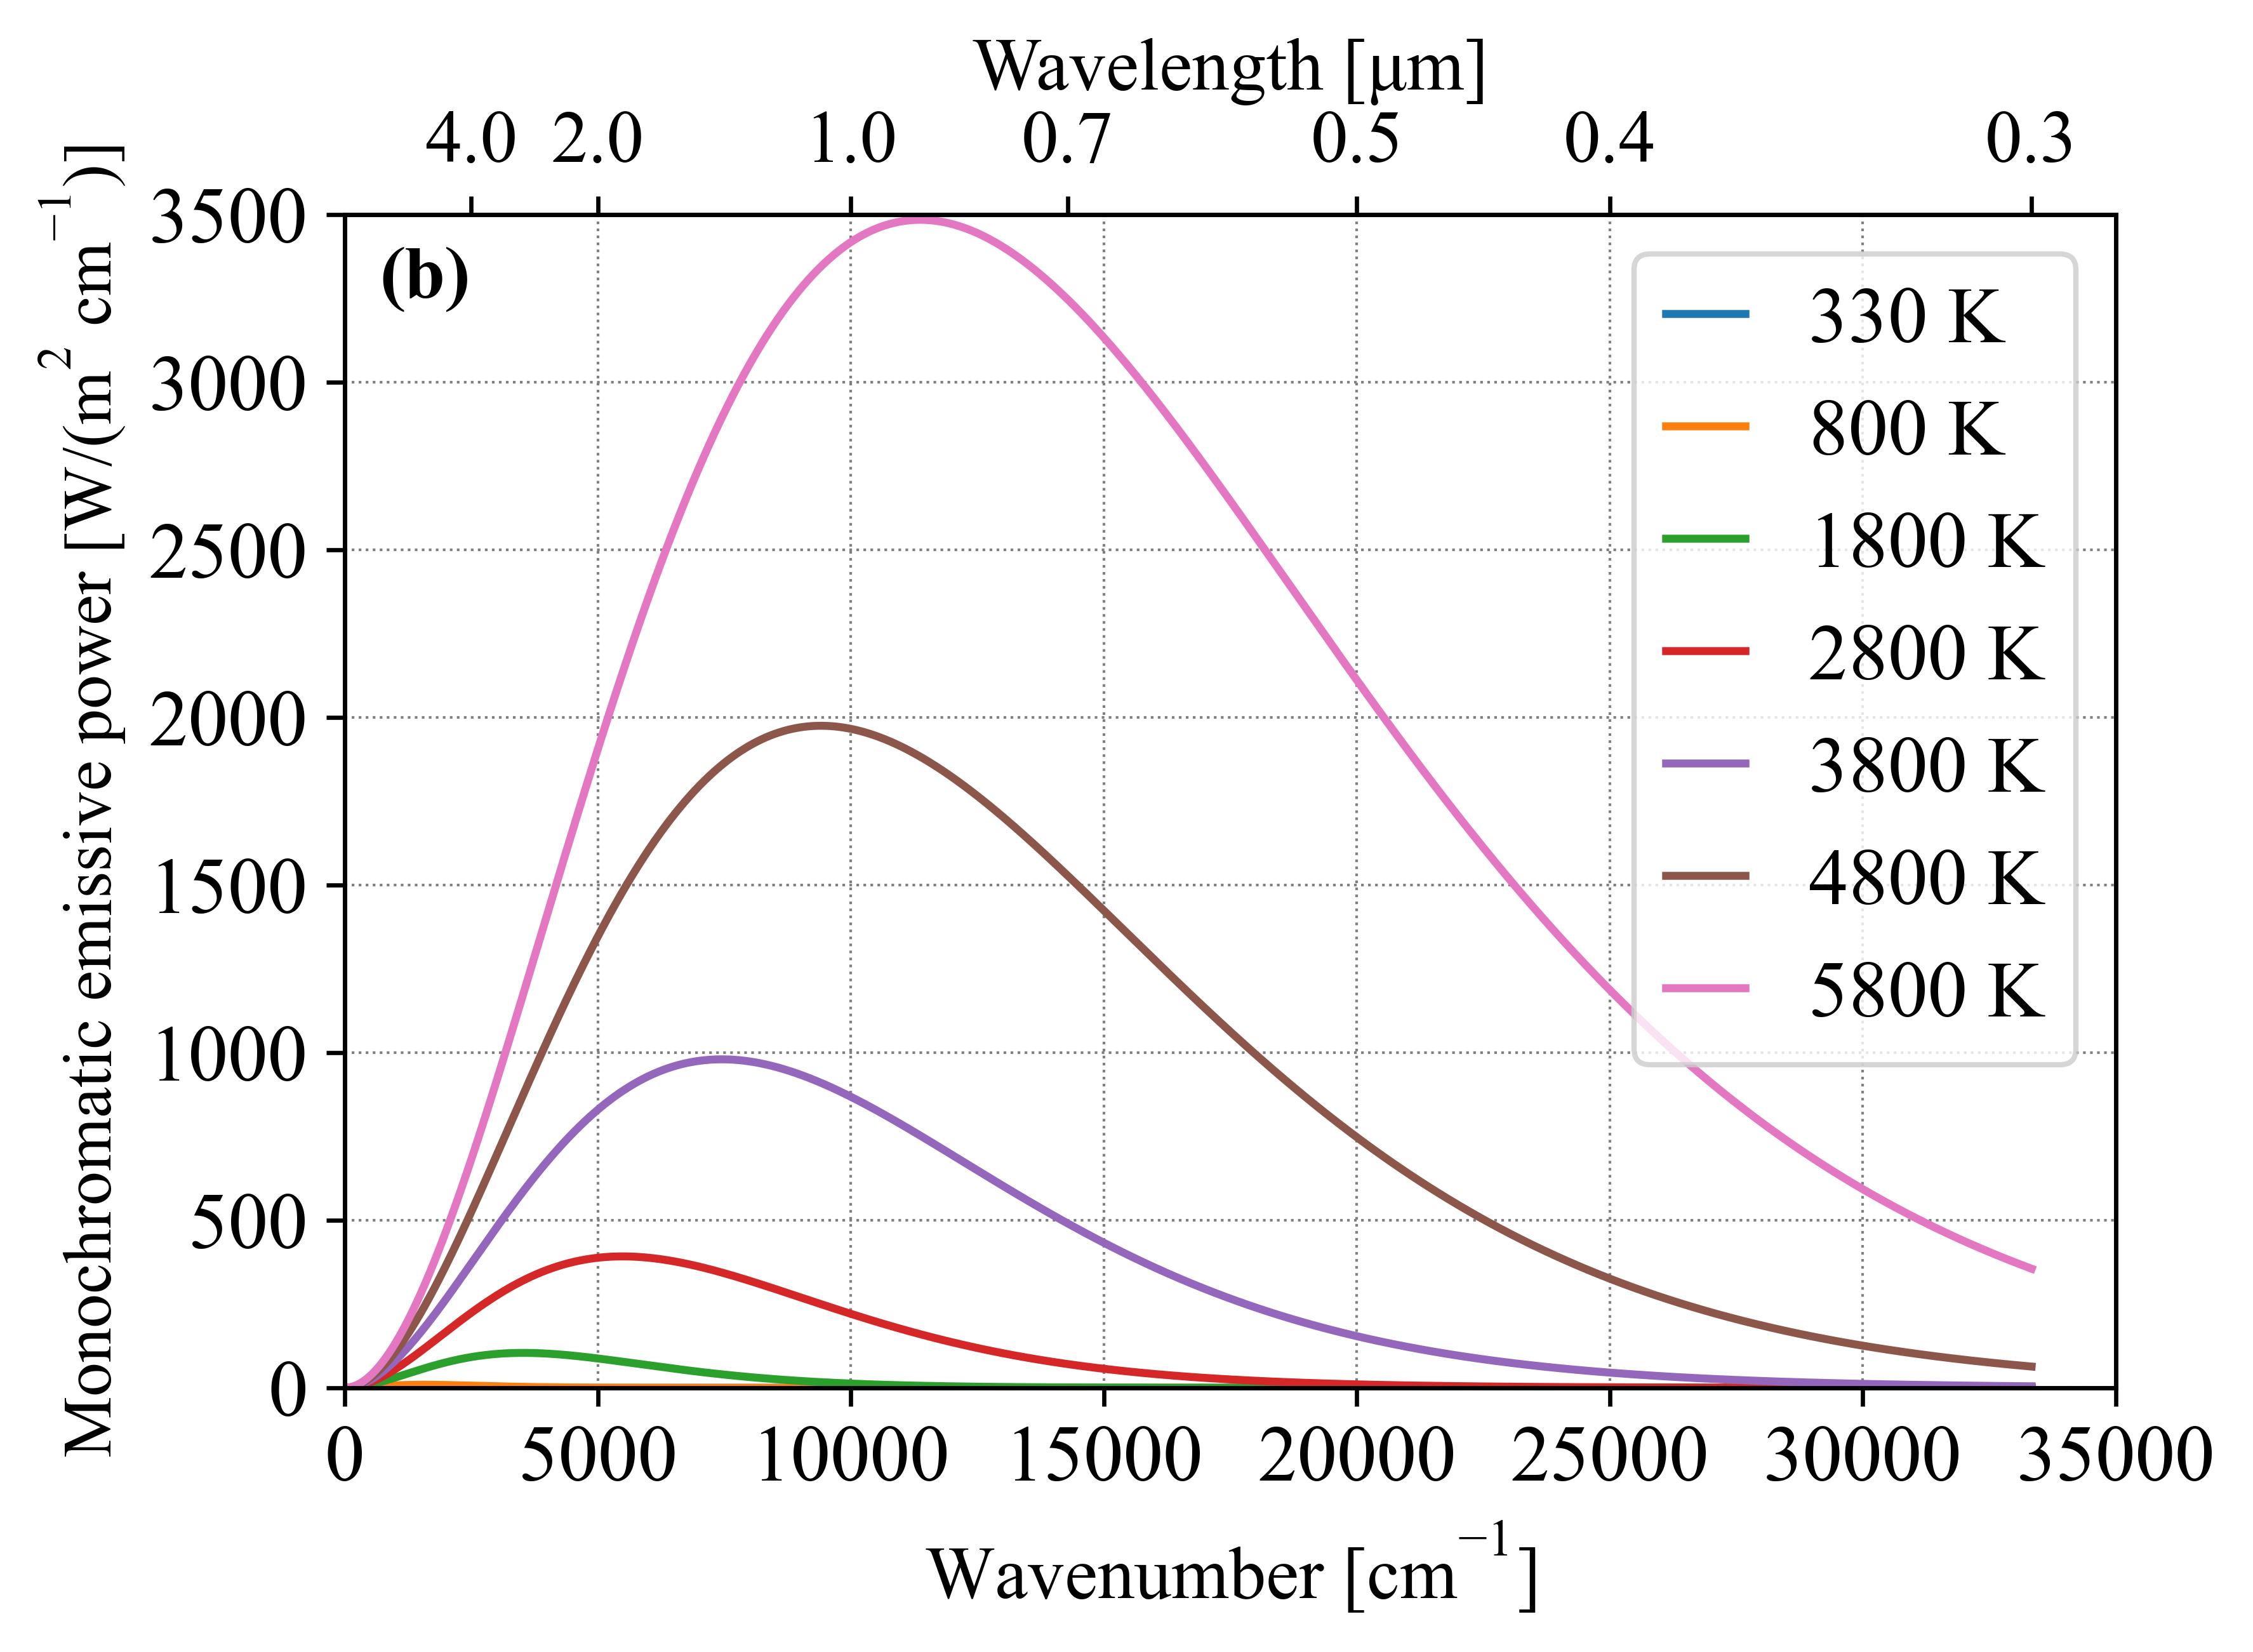

In [17]:
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 
b_lims=np.array([2500, 5000,10000, 14285, 20000, 25000, 33333])
fig = plt.figure(figsize=(6, 4), dpi=600)
font=14
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.

ax1 = fig.add_subplot(gs1[0])
for tt in range(T.shape[0]):
    ax1.plot(nu, F_dw_os[tt],label=f"{T[tt]} K")
#plt.legend(loc='best')
plt.legend(loc="upper right",handlelength=1)

yticks=[c for c in np.arange(0,3500+500,500, dtype=float)]
format_axes(ax1,(0,35000),(0,3500),np.arange(0,35000+5000,5000),yticks,True,True,ylabel=[])

ax1.set_ylabel(r'Monochromatic emissive power [W/($\mathrm{m}^2$ cm$^{-1}$)]',fontsize=font-1,family=fontfml)
ax1.set_xlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)
# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)

ax1.text(0.02, 0.93, '(b)', transform=ax1.transAxes, fontsize=font, family=fontfml,weight='bold')
fig.savefig(fig_dir+'LW_spectrum.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

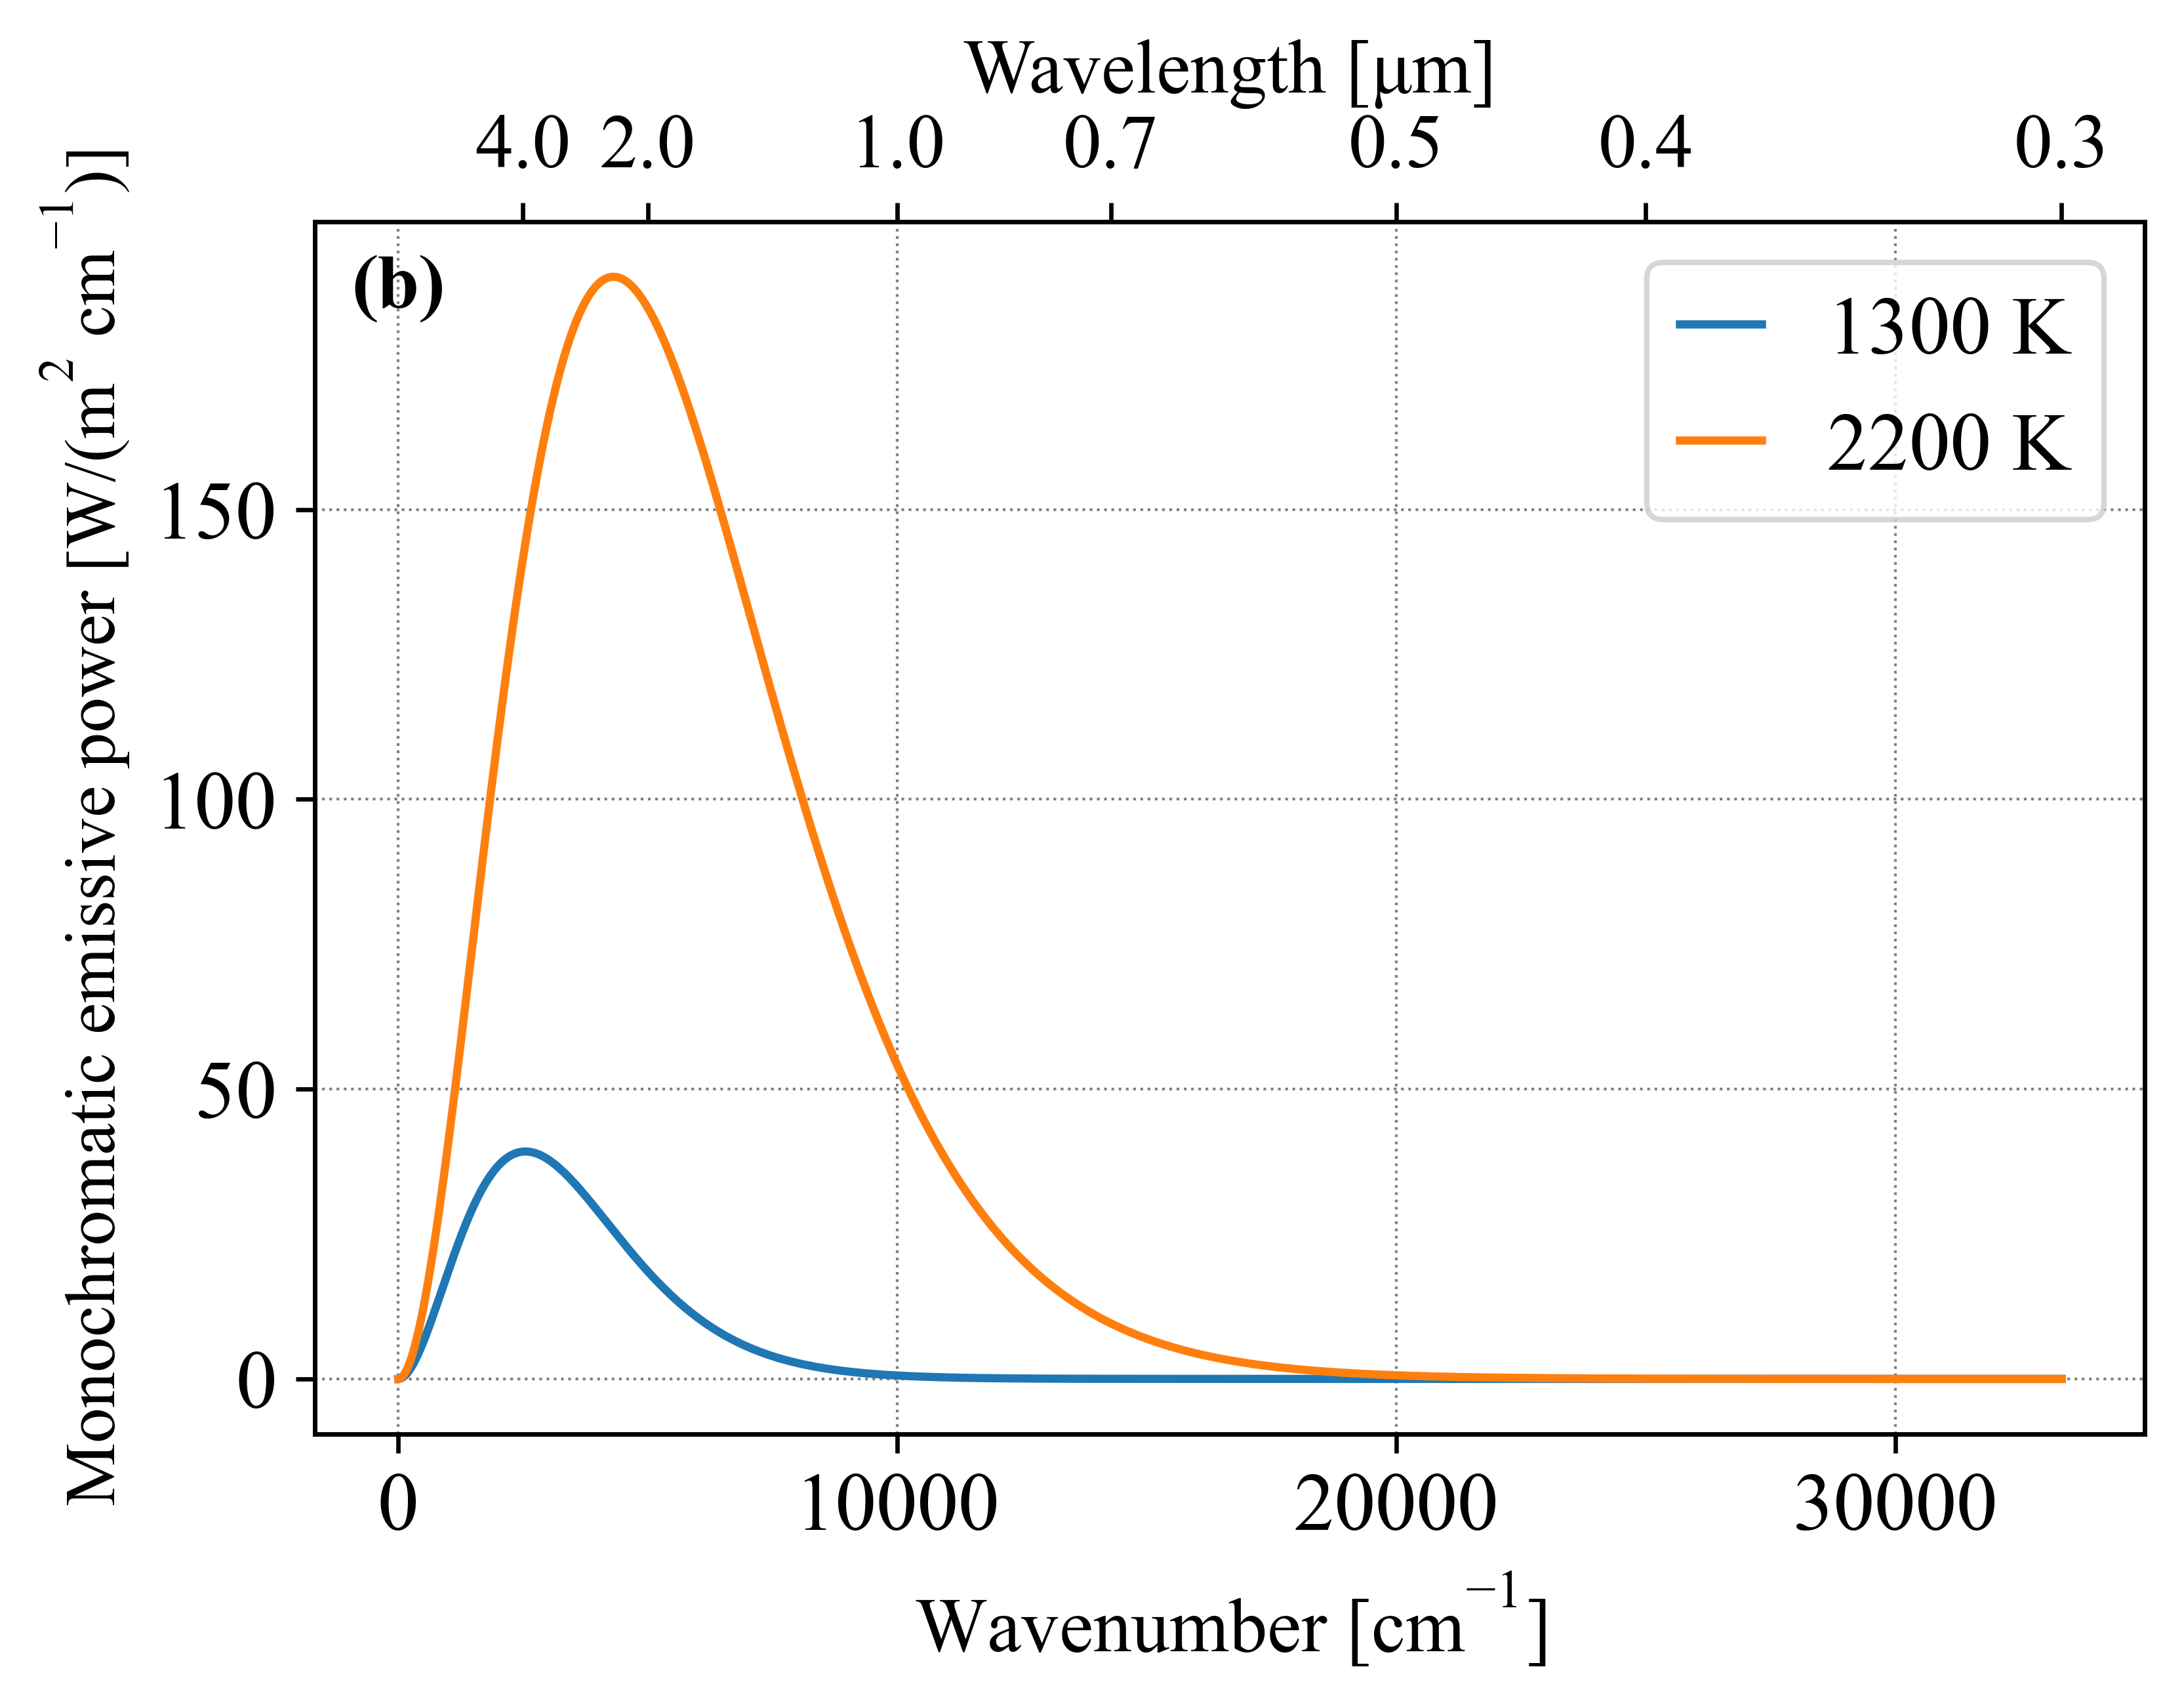

In [34]:
T = 1300 # K
F_dw_os = Planck(nu,T)*math.pi
T2 = 2200 # K
F_dw_os2 = Planck(nu,T2)*math.pi

plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 
b_lims=np.array([2500, 5000,10000, 14285, 20000, 25000, 33333])
fig = plt.figure(figsize=(6, 4), dpi=600)
font=14
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.

ax1 = fig.add_subplot(gs1[0])
ax1.plot(nu, F_dw_os,label=f"{T} K")
ax1.plot(nu, F_dw_os2,label=f"{T2} K")
#plt.legend(loc='best')
plt.legend(loc="upper right",handlelength=1)

#yticks=[c for c in np.arange(0,3500+500,500, dtype=float)]
#format_axes(ax1,(0,35000),(0,3500),np.arange(0,35000+5000,5000),yticks,True,True,ylabel=[])

ax1.set_ylabel(r'Monochromatic emissive power [W/($\mathrm{m}^2$ cm$^{-1}$)]',fontsize=font-1,family=fontfml)
ax1.set_xlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)
# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)

ax1.text(0.02, 0.93, '(b)', transform=ax1.transAxes, fontsize=font, family=fontfml,weight='bold')
#fig.savefig(fig_dir+'LW_spectrum.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [33]:
nu

array([    1,     6,    11, ..., 33326, 33331, 33336])

In [35]:
rate = integrate.trapz(F_dw_os[:2800],nu[:2800])/integrate.trapz(F_dw_os,nu)
rate

0.9998691256484622

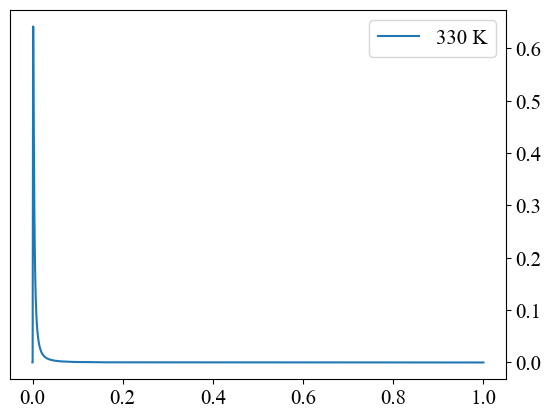

In [16]:
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.

ax1 = fig.add_subplot(gs1[0])
plt.plot(1/nu, F_dw_os[0],label=f"{T[0]} K")
plt.legend(loc='best')
plt.show()

# ground reflectance

In [1]:
from LBL_funcs_fullSpectrum import *
from LBL_funcs_waterRTM import *
import scipy.integrate as integrate
import math
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
sys.path.append(os.path.abspath("./test/"))
from DrLi_gorgeous_plotlib import *
fig_dir = "./figure/"

In [2]:
dnu=5
nu = np.arange(2500, 33333, dnu)
lam = 1e4 / nu  # wavelength in um
path='./'
surface='case2'
if 'case' in surface:
    filename = path+"data/CIRC/" + surface + "_input&output/sfcalbedo_input_" + surface + ".txt"
    data = np.genfromtxt(filename, skip_header=6)
    rho_s = np.interp(nu, data[:, 0], data[:, 1])

In [3]:
rho_s

array([0.09338, 0.09329, 0.09319, ..., 0.01017, 0.01017, 0.01017])

In [4]:
surface='nacl'
if surface == 'nacl':
    filename = path+''+'data/surface_reflectance/'+'fine_NaCl_spectrum'+".txt"
    data = np.genfromtxt(filename, skip_header=21)
    rho_s2 = np.interp(lam, data[:, 0], data[:, 1]/ 1e2) # um, %

In [5]:
surface='concrete'
if surface == 'concrete':
    filename = path+''+'data/surface_reflectance/'+'manmade_generalcement'+".txt"
    data = np.genfromtxt(filename, skip_header=21)
    rho_s3 = np.interp(lam, data[:, 0], data[:, 1]/ 1e2) # um, %

In [6]:
surface='moist_clay'
if surface == 'moist_clay':
    filename = path+''+'data/surface_reflectance/'+'soil_moist_clay_spectrum'+".txt"
    data = np.genfromtxt(filename, skip_header=21)
    rho_s4 = np.interp(lam, data[:, 0], data[:, 1]/ 1e2) # um, %

In [7]:
font=15
fontfml='Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

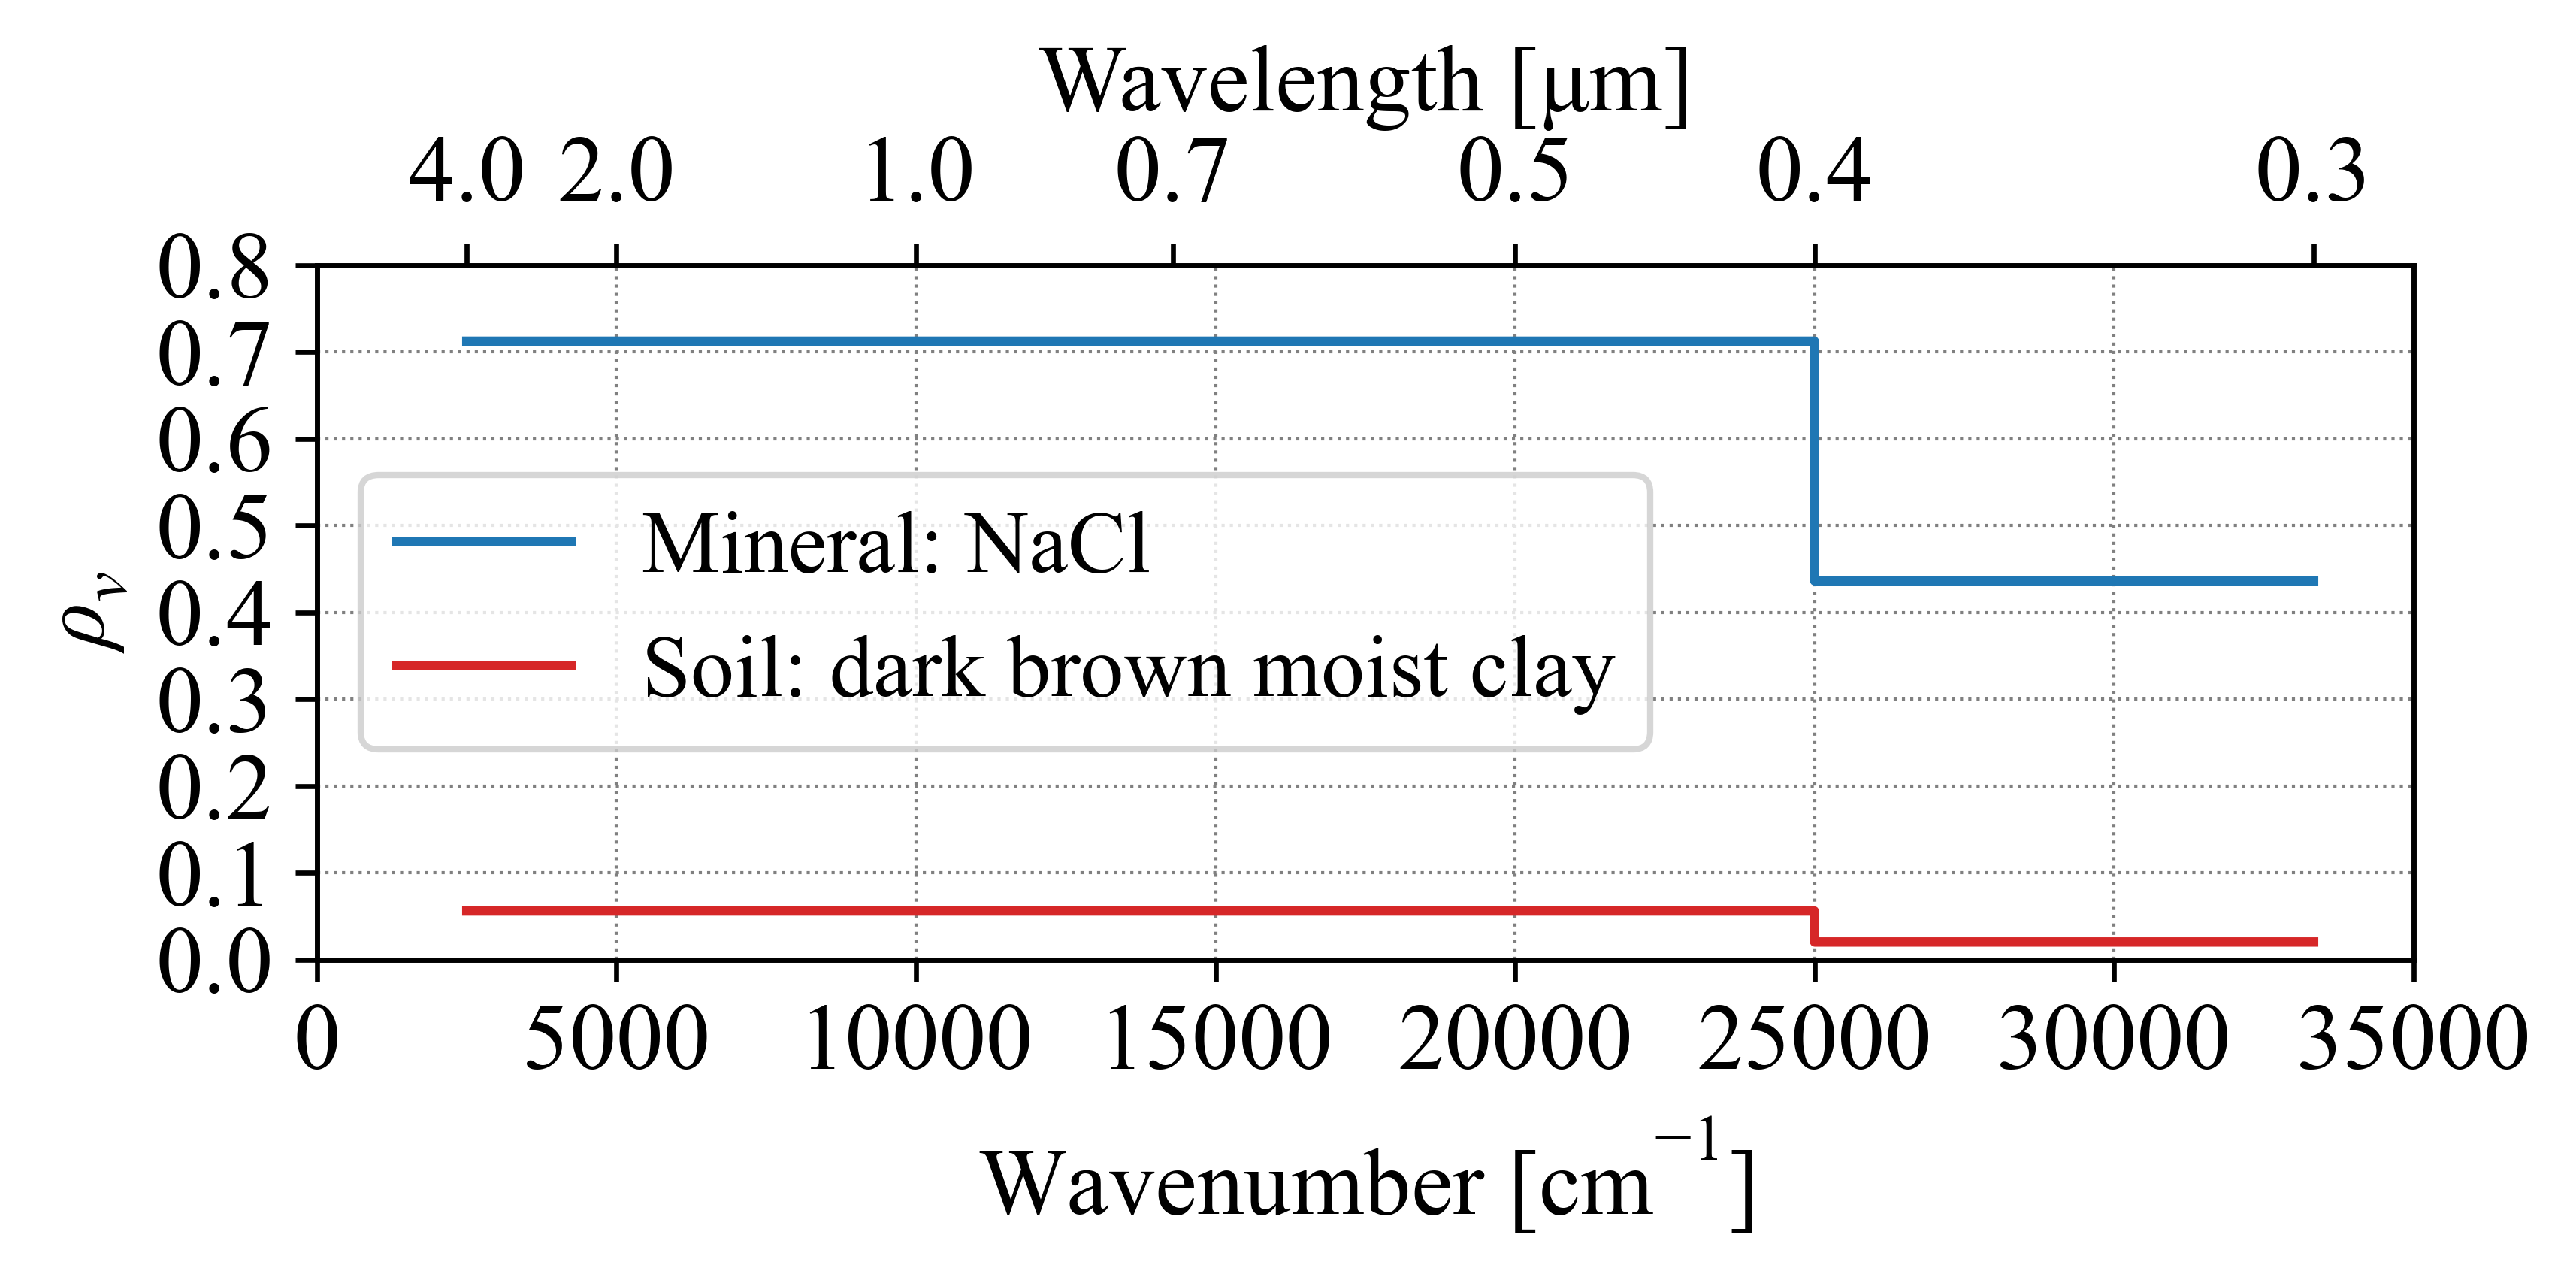

In [16]:
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 
b_lims=np.array([2500, 5000, 10000, 14285, 20000, 25000, 33333])
fig = plt.figure(figsize=(6, 2), dpi=600)

fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.

ax1 = fig.add_subplot(gs1[0])
#ax1.plot(nu, rho_s,label='CIRC-case1 soil')https://connectpolyu.sharepoint.com/sites/GRP_REALab/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=RPhftA&cid=131522b9%2Dd637%2D4887%2D9244%2D79f381b2cf8a&RootFolder=%2Fsites%2FGRP%5FREALab%2FShared%20Documents%2FREALab%20group%20meeting%20notes&FolderCTID=0x0120001FE0389D02A5F8498950C3BBA8A5F974)
ax1.plot(nu, rho_s2,label='Mineral: NaCl')
#ax1.plot(nu, rho_s3,label='Concrete')
ax1.plot(nu, rho_s4,label='Soil: dark brown moist clay',color="C3")
ax1.legend(loc='center left',fontsize=font-1)

yticks=[c for c in np.arange(0,0.9,0.1, dtype=float)]
format_axes(ax1,(0,33333),(0,0.8),np.arange(0,33333+5000,5000),yticks,True,True,ylabel=[])

ax1.set_ylabel(r'$\rho_\nu$',fontsize=font,family=fontfml)
ax1.set_xlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)
# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)

#ax1.text(0.02, 0.93, '(b)', transform=ax1.transAxes, fontsize=font+2, family=fontfml,weight='bold')
fig.savefig(fig_dir+'rho_spectrum.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [ ]:
concrete has an average albedo of 0.35